<a id="numerical"></a>
## </span><span style='color:#008ECC'> 1. Latar Belakang</span>

<div class="alert alert-info">

Perusahaan ini beroperasi di bidang Software as a Service (SaaS) yang menjual berbagai produk perangkat lunak berlangganan ke pelanggan bisnis di seluruh dunia. Perusahaan memiliki data penjualan yang cukup luas dengan lebih dari 9.990 transaksi yang tercatat dalam dataset.

<a id="numerical"></a>
## </span><span style='color:#008ECC'> 2. Pernyataan Masalah</span>

<div class="alert alert-info">

-	Produk Big Ol Database memiliki penjualan tinggi tetapi profit margin yang sangat rendah, bahkan mengalami penurunan drastis hingga -50%. 
-	Ada korelasi negatif yang sangat kuat (-0.90) antara profit margin dengan diskon, yang menunjukkan bahwa semakin tinggi diskon, semakin rendah profit margin. 
-	Yang paling mengkhawatirkan adalah korelasi negatif (-0.17) antara sales per unit dengan diskon, yang menunjukkan bahwa pemberian diskon besar (hingga 45%) tidak efektif dalam meningkatkan penjualan.

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import plotly.express as px
from scipy.stats import shapiro, kstest, normaltest
from statsmodels.stats.diagnostic import lilliefors
from scipy.stats import mannwhitneyu

import warnings
warnings.filterwarnings("ignore")

In [69]:
df=pd.read_csv('SaaS-Sales.csv')
display(df.head(),df.tail())

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,$261.96,2,$0.00,$41.91
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,$731.94,3,$0.00,$219.58
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,$14.62,2,$0.00,$6.87
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,$957.58,5,$0.45,$-383.03
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,$22.37,2,$0.20,$2.52


,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
9989,9990,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,$25.25,3,$0.20,$4.10
9990,9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,$91.96,2,$0.00,$15.63
9991,9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,$258.58,2,$0.20,$19.39
9992,9993,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,$29.60,4,$0.00,$13.32
9993,9994,AMER-2023-119914,5/5/2023,20230505,Jasmine Springer,United States,Dallas,AMER,NAMER,Comcast,1022,Communications,SMB,OneView,3NTBV9B3PS,$243.16,2,$0.00,$72.95


<div class="alert alert-info">

# Deskripsi kolom

| **Nama Kolom**     | **Penjelasan**                                           |
|--------------------|---------------------------------------------------------|
| **Row ID**         | ID baris yang unik untuk setiap transaksi.               |
| **Order ID**       | ID pesanan yang unik untuk setiap pembelian.             |
| **Order Date**     | Tanggal ketika pesanan dibuat.                           |
| **Date Key**       | Format angka dari tanggal pesanan (YYYYMMDD).            |
| **Contact Name**   | Nama kontak yang membuat pesanan.                        |
| **Country**        | Negara asal pemesanan.                                   |
| **City**           | Kota asal pemesanan.                                     |
| **Region**         | Kawasan asal pemesanan.                                  |
| **Subregion**      | Sub-kawasan asal pemesanan.                              |
| **Customer**       | Nama perusahaan pelanggan.                               |
| **Customer ID**    | ID unik untuk setiap pelanggan.                          |
| **Industry**       | Bidang industri pelanggan.                               |
| **Segment**        | Segmen pelanggan (SBM, Strategic, Enterprise).           |
| **Product**        | Nama produk yang dibeli.                                 |
| **License**        | Kode lisensi produk.                                     |
| **Sales**          | Nilai penjualan total transaksi.                         |
| **Quantity**       | Jumlah unit produk dalam transaksi.                      |
| **Discount**       | Potongan harga yang diberikan.                           |
| **Profit**         | Laba yang diperoleh dari transaksi.                      |

<a id="numerical"></a>
## </span><span style='color:#008ECC'> 3. Data Preprocessing</span>

In [52]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (9994, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      99

<a id="numerical"></a>
## </span><span style='color:#008ECC'>a. Konversi Tipe Data</span>

In [82]:
# ubah format order date dari object ke datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Date Key       9994 non-null   int64         
 4   Contact Name   9994 non-null   object        
 5   Country        9994 non-null   object        
 6   City           9994 non-null   object        
 7   Region         9994 non-null   object        
 8   Subregion      9994 non-null   object        
 9   Customer       9994 non-null   object        
 10  Customer ID    9994 non-null   int64         
 11  Industry       9994 non-null   object        
 12  Segment        9994 non-null   object        
 13  Product        9994 non-null   object        
 14  License        9994 non-null   object        
 15  Sales          9994 n

<div class="alert alert-info">

- Terdapat beberapa variabel numerik dalam dataset: `Sales`, `Quantity`, `Discount`, dan `Profit`
- Informasi wilayah tersedia pada kolom `Country`, `City`, dan `Region`
- `Order Date` perlu dikonversi ke dalam format datetime

<a id="numerical"></a>
## </span><span style='color:#008ECC'>b. Missing Values</span>

In [54]:
#cek missing value
df.isnull().sum()

Row ID          0
Order ID        0
Order Date      0
Date Key        0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

<div class="alert alert-info">

Tidak terdapat missing value atau data yang kosong pada dataset ini

<a id="numerical"></a>
## </span><span style='color:#008ECC'>c. Duplikat Data</span>

In [55]:
#cek duplikat
df.duplicated().sum()

0

<div class="alert alert-info">

Tidak terdapat data yang duplikat pada dataset ini

<a id="numerical"></a>
## </span><span style='color:#008ECC'>d. Menambah Kolom</span>

In [73]:
# Membuat kolom profit margin
# Profit Margin adalah metrik persentase keuntungan dari setiap penjualan 
df['Profit_Margin'] = (df['Profit'] / df['Sales']) * 100

In [74]:
# membuat kolom year berdasarkan order date
df['Year'] = df['Order Date'].dt.year

In [75]:
#membuat kolom quarter
# Year Quarter adalah mengelompokkan data berdasarkan tahun dan quarter
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['YearQuarter'] = df['Order Date'].dt.to_period('Q').astype(str)

In [76]:
# membuat kolom sales per unit
# Sales per unit adalah jumlah penjualan per unit
df['SalesPerUnit'] = df['Sales'] / df['Quantity']

In [77]:
# membuat kolom profit per unit
# Profit per unit adalah keuntungan per unit
df['ProfitPerUnit'] = df['Profit'] / df['Quantity']

In [78]:
df

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,...,License,Sales,Quantity,Discount,Profit,Profit_Margin,Year,YearQuarter,SalesPerUnit,ProfitPerUnit
0,1,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,...,16GRM07R1K,$261.96,2,$0.00,$41.91,$16.00,2022,2022Q4,$130.98,$20.96
1,2,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,...,QLIW57KZUV,$731.94,3,$0.00,$219.58,$30.00,2022,2022Q4,$243.98,$73.19
2,3,AMER-2022-138688,2022-06-13,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,...,JI6BVL70HQ,$14.62,2,$0.00,$6.87,$47.00,2022,2022Q2,$7.31,$3.44
3,4,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,...,DE9GJKGD44,$957.58,5,$0.45,$-383.03,$-40.00,2021,2021Q4,$191.52,$-76.61
4,5,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,...,OIF7NY23WD,$22.37,2,$0.20,$2.52,$11.25,2021,2021Q4,$11.18,$1.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,EMEA-2020-110422,2020-01-22,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,...,ETHXMB5TMD,$25.25,3,$0.20,$4.10,$16.25,2020,2020Q1,$8.42,$1.37
9990,9991,AMER-2023-121258,2023-02-27,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,...,LYHOKTRY7L,$91.96,2,$0.00,$15.63,$17.00,2023,2023Q1,$45.98,$7.82
9991,9992,AMER-2023-121258,2023-02-27,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,...,I5SVMI6M88,$258.58,2,$0.20,$19.39,$7.50,2023,2023Q1,$129.29,$9.70
9992,9993,AMER-2023-121258,2023-02-27,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,...,JHLW4P6LQ2,$29.60,4,$0.00,$13.32,$45.00,2023,2023Q1,$7.40,$3.33


In [93]:
categorical = df.select_dtypes(include='object')

for col in categorical:
    print(df[col].unique())
    print()

['EMEA-2022-152156' 'AMER-2022-138688' 'EMEA-2021-108966' ...
 'EMEA-2020-110422' 'AMER-2023-121258' 'AMER-2023-119914']

['Nathan Bell' 'Deirdre Bailey' 'Zoe Hodges' 'Thomas Hodges'
 'Adrian Hunter' 'Adrian Abraham' 'Emily Morrison' 'Claire Welch'
 'Carol Campbell' 'Blake Hughes' 'Melanie Sharp' 'Luke Bower'
 'Jonathan Ferguson' 'Sam Parsons' 'Neil Gill' 'Amelia Campbell'
 'Chloe Short' 'Jasmine Metcalfe' 'Karen Mathis' 'Dylan Dickens'
 'Sophie Lewis' 'Gavin Mitchell' 'Katherine Dowd' 'Harry Brown'
 'Brian Dickens' 'Joseph Newman' 'Nicola Howard' 'Stewart Wilson'
 'Eric McLean' 'Leah Clarkson' 'Alison Davidson' 'Sophie Vance' 'Anne Lee'
 'Maria Dyer' 'Julia Ellison' 'Gordon McLean' 'Jessica Buckland'
 'Bernadette Nolan' 'Sonia Ince' 'William Lewis' 'Melanie Young'
 'Edward Oliver' 'Peter Quinn' 'Max Marshall' 'Jan Watson' 'Carol Ball'
 'Gavin Walsh' 'Penelope Peake' 'Amy Scott' 'Carl Jackson' 'Joe Wallace'
 'Luke Mills' 'Alexandra Dyer' 'Rebecca Dickens' 'Audrey Hardacre'
 'Jennifer D

<div class="alert alert-info">

**Temuan:**

1. Dataset ini mencakup transaksi dari 3 wilayah utama: EMEA, AMER, dan APJ.

| Wilayah | Nama Lengkap                     | Penjelasan                                                                                     |
|---------|----------------------------------|------------------------------------------------------------------------------------------------|
| EMEA    | Eropa, Timur Tengah, Afrika      | Meliputi negara-negara di Eropa, Timur Tengah, dan Afrika.                                     |
| AMER    | Amerika Utara dan Selatan        | Mencakup Amerika Serikat, Kanada, Meksiko, serta negara-negara di Amerika Selatan.            |
| APJ     | Asia Pasifik                     | Meliputi Asia Timur, Asia Tenggara, dan Oseania, termasuk Australia.                          |

2. Terdapat beberapa subwilayah:

| Subwilayah | Nama Lengkap                   | Penjelasan                                                                                     |
|------------|--------------------------------|------------------------------------------------------------------------------------------------|
| UKIR       | Inggris dan Irlandia           | Mencakup Inggris Raya dan Republik Irlandia, dianggap sebagai pasar yang berbeda.              |
| NAMER      | Amerika Utara                 | Meliputi Amerika Serikat, Kanada, dan Meksiko, dikenal dengan basis konsumen yang besar.       |
| EU-WEST    | Eropa Barat                   | Mencakup negara seperti Prancis, Jerman, dan Belanda, dikenal dengan ekonomi maju.             |
| NOR        | Negara Nordik                 | Meliputi Denmark, Finlandia, Islandia, Norwegia, dan Swedia, terkenal dengan kualitas hidup tinggi. |
| JAPN       | Jepang                        | Mengacu khusus pada Jepang.                                                                   |
| EU         | Uni Eropa                     | Mencakup negara-negara anggota Uni Eropa, ditandai dengan integrasi ekonomi dan kebijakan bersama. |
| MEA        | Timur Tengah dan Afrika       | Meliputi negara-negara di Timur Tengah dan Afrika, dengan ekonomi dan budaya yang beragam.     |
| LATAM      | Amerika Latin                 | Mencakup Amerika Tengah dan Selatan, dikenal dengan budaya dan ekonomi yang beragam.           |
| ANZ        | Australia dan Selandia Baru   | Meliputi Australia dan Selandia Baru.                                                         |
| APAC       | Asia-Pasifik                  | Mencakup negara-negara di Asia Timur, Asia Tenggara, dan Oseania, terkenal dengan pertumbuhan cepat. |
| IND        | India                         | Mengacu khusus pada India.                                                                    |
| EU-EAST    | Eropa Timur                   | Mencakup negara seperti Polandia.                                                             |

</div>

<a id="numerical"></a>
## </span><span style='color:#008ECC'>e. Statistika</span>

In [85]:
numeric = df[["Sales", "Quantity", "Discount", "Profit", "Profit_Margin", "SalesPerUnit", "ProfitPerUnit"]]
numeric.describe()

,Sales,Quantity,Discount,Profit,Profit_Margin,SalesPerUnit,ProfitPerUnit
count,$9994.00,$9994.00,$9994.00,$9994.00,$9994.00,$9994.00,$9994.00
mean,$229.86,$3.79,$0.16,$28.66,$12.03,$60.92,$7.80
std,$623.25,$2.23,$0.21,$234.26,$46.68,$142.93,$56.07
min,$0.44,$1.00,$0.00,$-6599.98,$-275.00,$0.34,$-1320.00
25%,$17.28,$2.00,$0.00,$1.73,$7.50,$5.47,$0.72
50%,$54.49,$3.00,$0.20,$8.67,$27.00,$16.27,$2.77
75%,$209.94,$5.00,$0.20,$29.36,$36.25,$63.94,$8.70
max,$22638.48,$14.00,$0.80,$8399.98,$50.00,$3773.08,$1680.00


<div class="alert alert-info">

**Temuan Statistik:**

- Terdapat total 9.994 transaksi dalam dataset.
- Sebagian transaksi mengalami kerugian, terlihat dari adanya nilai negatif pada kolom Profit.
- Diskon yang diberikan sebagian besar berkisar antara 0% hingga 20%, dan diskon tertinggi tercatat sebesar 80%, yang tergolong sangat tinggi.
- Profit Margin (laba dibandingkan penjualan) berkisar dari -275% hingga 50%, menunjukkan bahwa beberapa produk dijual dengan rugi besar, sementara yang lain memberikan margin keuntungan cukup tinggi.
- Sales per Unit menunjukkan rata-rata penjualan sebesar sekitar $60.92 per unit, dengan nilai maksimum mencapai lebih dari $3.700 per unit, yang mengindikasikan adanya produk premium atau penjualan dalam jumlah besar.
- Profit per Unit bervariasi cukup ekstrem, mulai dari kerugian -$1.320 per unit hingga keuntungan $1.680 per unit, menandakan adanya perbedaan profitabilitas yang cukup tajam antar produk atau transaksi.

In [15]:
numeric = df[["Sales", "Quantity", "Discount", "Profit", "Profit_Margin", "SalesPerUnit", "ProfitPerUnit"]]

# Untuk menyimpan hasil
results = []

print("H0 = Data berdistribusi normal")
print("H1 = Data tidak berdistribusi normal")

for kolom in numeric.columns:
    # Kolmogorov-Smirnov Test
    ks_stat, ks_pval = kstest(df[kolom], 'norm')

    # Shapiro-Wilk Test
    shapiro_stat, shapiro_pval = shapiro(df[kolom])

    # Lilliefors Test
    lilliefors_stat, lilliefors_pval = lilliefors(df[kolom])

    # D'Agustino Pearson Test
    normaltest_stat, normaltest_pval = normaltest(df[kolom])

    # Menentukan hasil
    results.append({
        'Kolom': kolom,
        'KS_p-value': ks_pval,
        'Shapiro_p-value': shapiro_pval,
        'Pearson_p-value': normaltest_pval,
        'Lilliefors_p-value': lilliefors_pval,
        'KS_Result': 'Tolak H0' if ks_pval < 0.05 else 'Gagal Menolak H0',
        'Shapiro_Result': 'Tolak H0' if shapiro_pval < 0.05 else 'Gagal Menolak H0',
        'Lilliefors_Result': 'Tolak H0' if lilliefors_pval < 0.05 else 'Gagal Menolak H0',
        'Pearson_Result': 'Tolak H0' if normaltest_pval < 0.05 else 'Gagal Menolak H0'
    })

# Mengubah hasil menjadi DataFrame
results_df = pd.DataFrame(results)

# Tampilkan hasil
results_df

H0 = Data berdistribusi normal
H1 = Data tidak berdistribusi normal


,Kolom,KS_p-value,Shapiro_p-value,Pearson_p-value,Lilliefors_p-value,KS_Result,Shapiro_Result,Lilliefors_Result,Pearson_Result
0,Sales,0.0,4.065054e-105,0.0,0.001,Tolak H0,Tolak H0,Tolak H0,Tolak H0
1,Quantity,0.0,1.518566e-65,0.0,0.001,Tolak H0,Tolak H0,Tolak H0,Tolak H0
2,Discount,0.0,1.030847e-84,0.0,0.001,Tolak H0,Tolak H0,Tolak H0,Tolak H0
3,Profit,0.0,1.698786e-107,0.0,0.001,Tolak H0,Tolak H0,Tolak H0,Tolak H0
4,Profit_Margin,0.0,2.752409e-87,0.0,0.001,Tolak H0,Tolak H0,Tolak H0,Tolak H0
5,SalesPerUnit,0.0,3.873249e-103,0.0,0.001,Tolak H0,Tolak H0,Tolak H0,Tolak H0
6,ProfitPerUnit,0.0,1.654562e-106,0.0,0.001,Tolak H0,Tolak H0,Tolak H0,Tolak H0


<div class="alert alert-info">

Dari hasil uji normalitas diatas terlihat bahwa variabel `Sales`, `Quantity`, `Discount`, `Profit` , `Profit_Margin`, `SalesPerUnit` dan `ProfitPerUnit` memiliki distribusi yang tidak normal, berdasarkan 5 uji normalitas.

<a id="numerical"></a>
## </span><span style='color:#008ECC'>f. outliers</span>

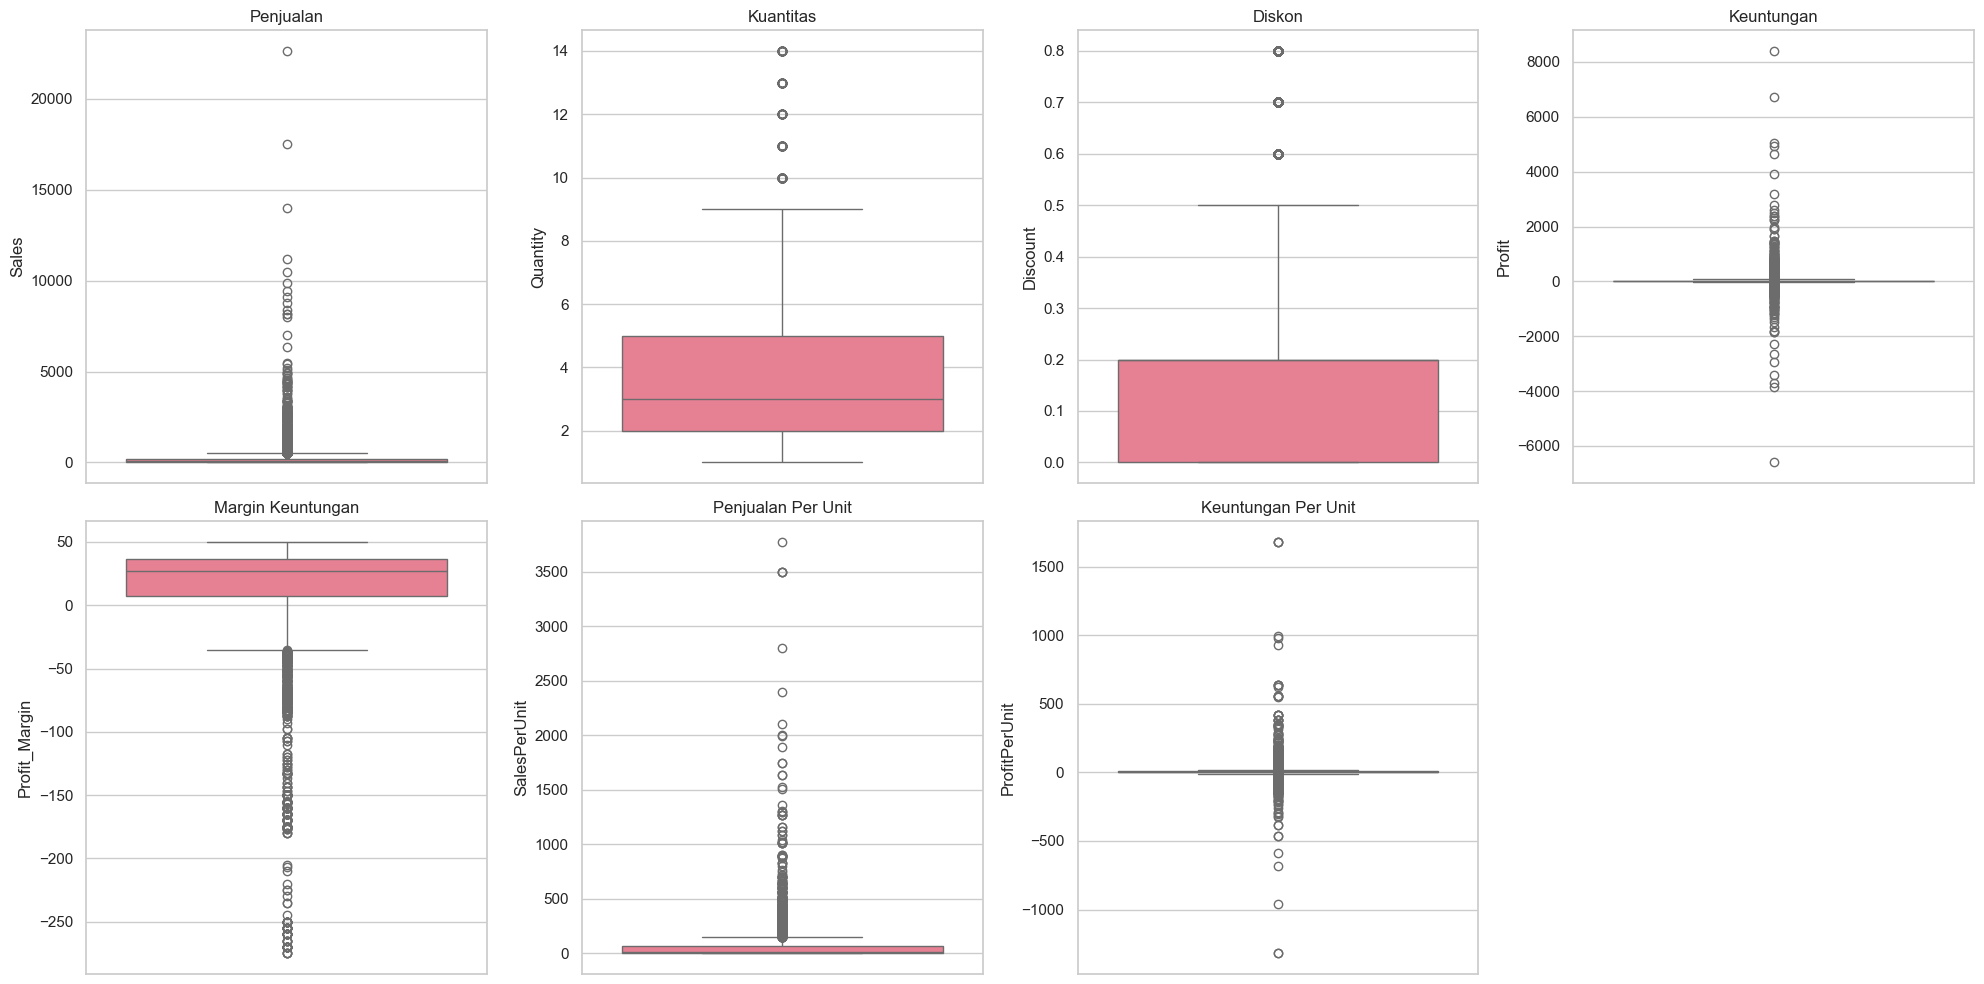

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pilih kolom numerik
numeric = df[["Sales", "Quantity", "Discount", "Profit", "Profit_Margin", "SalesPerUnit", "ProfitPerUnit"]]
sns.set_theme(style="whitegrid", palette="husl")

# Buat subplot (2 baris, 4 kolom untuk 7 boxplot)
fig, axes = plt.subplots(2, 4, figsize=(20, 10), tight_layout=True)

# Ratakan axes untuk memudahkan pengindeksan
axes = axes.flatten()

# Boxplot untuk setiap fitur
sns.boxplot(y=numeric["Sales"], ax=axes[0]).set_title('Penjualan')
sns.boxplot(y=numeric["Quantity"], ax=axes[1]).set_title('Kuantitas')
sns.boxplot(y=numeric["Discount"], ax=axes[2]).set_title('Diskon')
sns.boxplot(y=numeric["Profit"], ax=axes[3]).set_title('Keuntungan')
sns.boxplot(y=numeric["Profit_Margin"], ax=axes[4]).set_title('Margin Keuntungan')
sns.boxplot(y=numeric["SalesPerUnit"], ax=axes[5]).set_title('Penjualan Per Unit')
sns.boxplot(y=numeric["ProfitPerUnit"], ax=axes[6]).set_title('Keuntungan Per Unit')

# Sembunyikan subplot kosong (posisi ke-8)
axes[7].set_visible(False)

# Atur jarak antar subplot
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.show()

In [88]:
results = []

for col in numeric:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    non_outliers = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    results.append({
        "Category": col,
        "Lower Bound": lower_bound,
        "Upper Bound": upper_bound,
        "Lower Outliers": len(df[df[col] < lower_bound]),
        "Non Outliers": len(non_outliers),
        "Upper Outliers": len(df[df[col] > upper_bound]),
        "Outliers Proportion": f"{len(outliers) / len(df):.4f}"
    })

# Create a DataFrame from the results
outlier_summary_df = pd.DataFrame(results)

# Display the resulting DataFrame
outlier_summary_df


,Category,Lower Bound,Upper Bound,Lower Outliers,Non Outliers,Upper Outliers,Outliers Proportion
0,Sales,$-271.71,$498.93,0,8827,1167,0.1168
1,Quantity,$-2.50,$9.50,0,9824,170,0.0170
2,Discount,$-0.30,$0.50,0,9138,856,0.0857
3,Profit,$-39.72,$70.82,604,8113,1277,0.1882
4,Profit_Margin,$-35.62,$79.38,952,9042,0,0.0953
5,SalesPerUnit,$-82.23,$151.64,0,8940,1054,0.1055
6,ProfitPerUnit,$-11.25,$20.67,655,8103,1236,0.1892


<div class="alert alert-info">

Outliers pada data penjualan, kuantitas, diskon, keuntungan, margin keuntungan, penjualan per unit, dan keuntungan per unit sebaiknya dipertahankan karena mereka mencerminkan variasi alami dalam bisnis, seperti penjualan besar saat promosi atau keuntungan tinggi dari produk premium, dan bukan kesalahan data. Ini memastikan analisis tetap mencerminkan realitas.

## </span><span style='color:#008ECC'>Profitabilitas Per Produk</span>

In [18]:
# Menghitung metrik profitabilitas per produk
product_metrics = df.groupby('Product').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Row ID': 'count'  # Jumlah transaksi
}).reset_index()

# Menambahkan kolom margin profit
product_metrics['Profit_Margin'] = (product_metrics['Profit'] / product_metrics['Sales']) * 100

# Menambahkan kolom rata-rata penjualan per transaksi
product_metrics['Avg_Sales_Per_Transaction'] = product_metrics['Sales'] / product_metrics['Row ID']

# Mengurutkan berdasarkan total penjualan

# Mengurutkan berdasarkan total penjualan
product_metrics_by_sales = product_metrics.sort_values('Sales', ascending=False)

product_metrics_by_sales

,Product,Sales,Profit,Row ID,Profit_Margin,Avg_Sales_Per_Transaction
3,ContactMatcher,410378.2650,12496.2822,1842,3.045064,222.789503
5,FinanceHub,340935.4150,32136.4203,981,9.425955,347.538649
11,Site Analytics,330007.0540,44515.7306,889,13.489327,371.211534
7,Marketing Suite - Gold,223843.6080,21278.8264,846,9.506113,264.590553
1,Big Ol Database,189238.6310,3384.7569,115,1.788618,1645.553313
4,Data Smasher,167380.3180,41936.6357,775,25.054700,215.974604
0,Alchemy,149528.0300,55617.8249,68,37.195585,2198.941618
13,Support,125152.7440,32864.4698,1560,26.259488,80.226118
6,Marketing Suite,114879.9963,-3472.5560,228,-3.022768,503.859633
8,OneView,107532.1610,18138.0054,466,16.867517,230.755710


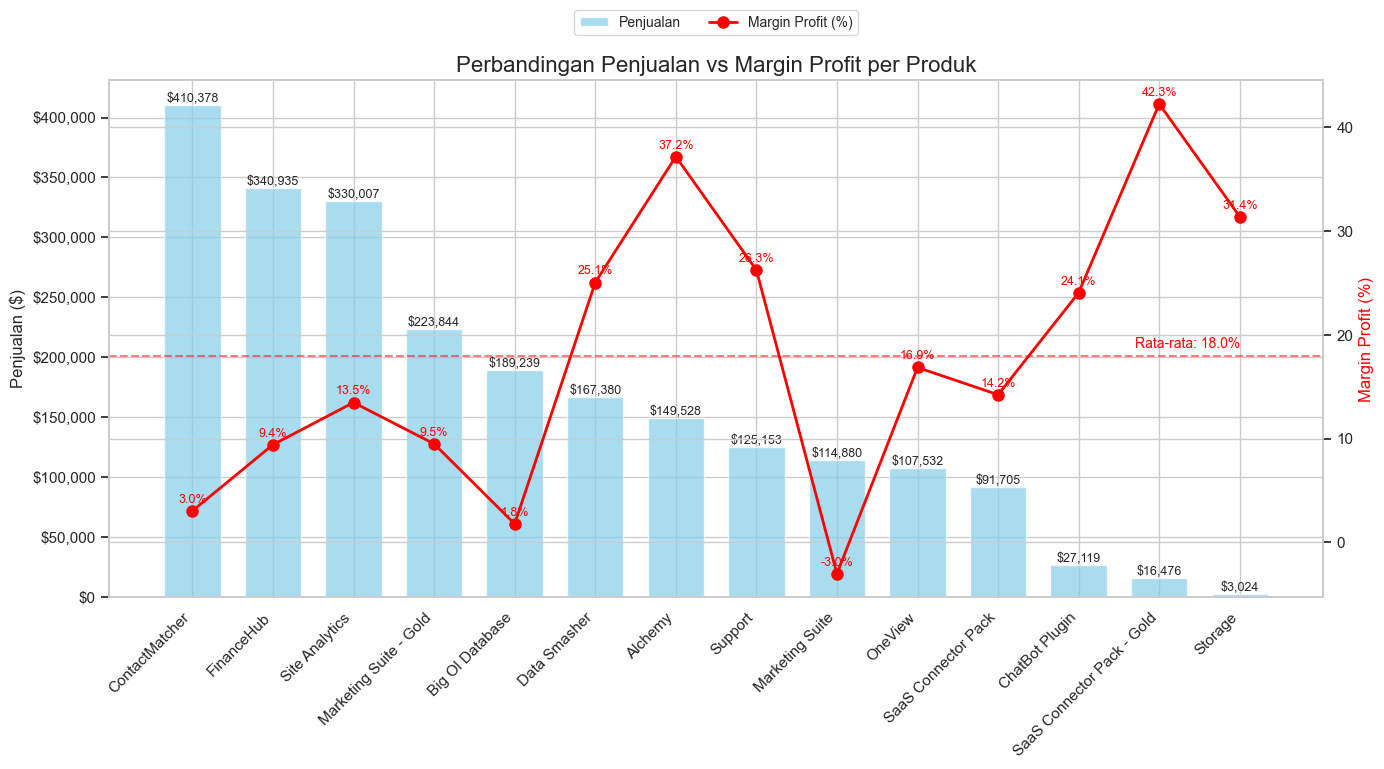

In [95]:
# Analisis profitabilitas produk
def analyze_product_profitability(df):
    # Menghitung metrik per produk
    product_metrics = df.groupby('Product').agg({
        'Sales': 'sum',
        'Profit': 'sum'
    }).reset_index()
    
    # Menghitung margin profit
    product_metrics['Profit_Margin'] = (product_metrics['Profit'] / product_metrics['Sales']) * 100
    
    # Mengurutkan berdasarkan penjualan
    product_metrics_by_sales = product_metrics.sort_values('Sales', ascending=False)
    
    return product_metrics_by_sales

# Jalankan analisis profitabilitas produk
product_metrics = analyze_product_profitability(df)

# Visualisasi perbandingan penjualan vs margin profit
plt.figure(figsize=(14, 8))
ax = plt.subplot(111)

# Persiapan data
products = product_metrics['Product'].head(15)  # 15 produk teratas berdasarkan penjualan
x = np.arange(len(products))
sales = product_metrics['Sales'].head(15)
margins = product_metrics['Profit_Margin'].head(15)

# Mengurutkan produk berdasarkan penjualan
sorted_indices = np.argsort(-sales)
products = products.iloc[sorted_indices]
sales = sales.iloc[sorted_indices]
margins = margins.iloc[sorted_indices]

# Plot batang untuk penjualan
bars = ax.bar(x, sales, width=0.7, color='skyblue', alpha=0.7, label='Penjualan')

# Menambahkan label nilai penjualan
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.1,
            f'${height:,.0f}', ha='center', va='bottom', rotation=0, fontsize=9)

# Sumbu Y sekunder untuk margin profit
ax2 = ax.twinx()
profit_line = ax2.plot(x, margins, 'ro-', linewidth=2, markersize=8, label='Margin Profit (%)')

# Menambahkan label nilai margin profit
for i, margin in enumerate(margins):
    ax2.text(i, margin + 0.5, f'{margin:.1f}%', ha='center', va='bottom', color='red', fontsize=9)

# Konfigurasi plot
ax.set_xticks(x)
ax.set_xticklabels(products, rotation=45, ha='right')
ax.set_ylabel('Penjualan ($)', fontsize=12)
ax2.set_ylabel('Margin Profit (%)', fontsize=12, color='r')
ax.set_title('Perbandingan Penjualan vs Margin Profit per Produk', fontsize=16)

# Format sumbu y untuk penjualan
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: f'${x:,.0f}'))

# Menambahkan garis rata-rata margin profit
avg_margin = margins.mean()
ax2.axhline(y=avg_margin, color='red', linestyle='--', alpha=0.5)
ax2.text(len(products)-1, avg_margin + 0.5, f'Rata-rata: {avg_margin:.1f}%', 
         ha='right', va='bottom', color='red', fontsize=10)

# Menggabungkan legends dan memindahkannya ke atas grafik
lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

# Membuat legenda di atas plot
plt.legend(lines1 + lines2, labels1 + labels2, 
           loc='upper center', bbox_to_anchor=(0.5, 1.15), 
           ncol=2, frameon=True, fontsize=10)

# Menyesuaikan layout agar semua elemen terlihat
plt.tight_layout()

# Menampilkan plot
plt.show()

<div class="alert alert-info">

**Analisis Profitabilitas Produk:**

Alchemy unggul dengan margin profit 37,2%, sementara ContactMatcher dengan volume penjualan tertinggi hanya mencapai margin 3,1%. Produk versi Gold konsisten lebih menguntungkan, dengan SaaS Connector Pack - Gold meraih margin 42,3% dibanding 14,2% versi reguler. Marketing Suite (-3,0%) dan Big Ol Database (1,8%) menunjukkan kinerja yang mengkhawatirkan. OneView (16,9%), Data Smasher (25,1%), dan Support (26,3%) menampilkan keseimbangan baik antara volume dan profitabilitas.

## </span><span style='color:#008ECC'>Segmentasi Produk</span>

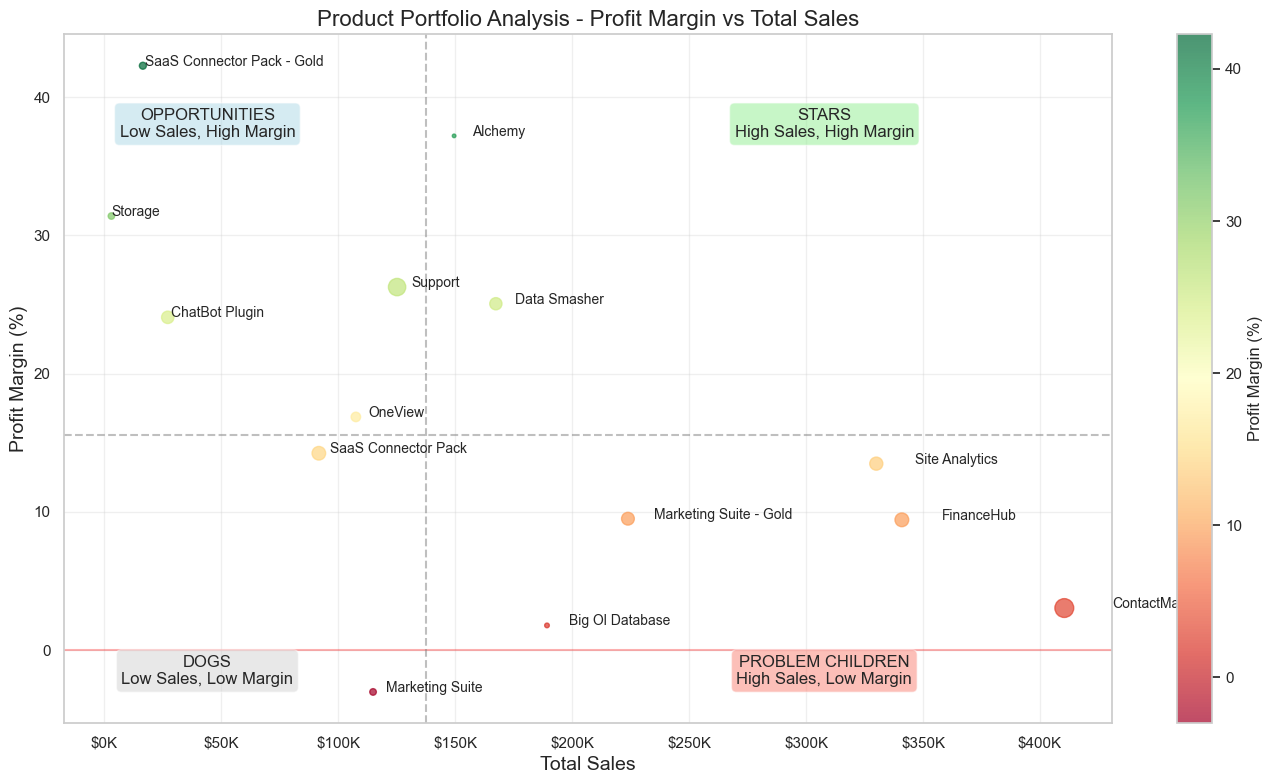

Median Sales: $137,340.39
Median Profit Margin: 15.55%

Hasil Kategorisasi BCG Matrix:
--------------------------------------------------------------------------------
| Produk                   | Penjualan       | Margin    | Kategori            |
--------------------------------------------------------------------------------
| Alchemy                  | $149,528.03      | 37.20%     | STARS           |
| Big Ol Database          | $189,238.63      | 1.79%      | PROBLEM CHILDREN |
| ChatBot Plugin           | $27,118.79       | 24.07%     | OPPORTUNITIES   |
| ContactMatcher           | $410,378.27      | 3.05%      | PROBLEM CHILDREN |
| Data Smasher             | $167,380.32      | 25.05%     | STARS           |
| FinanceHub               | $340,935.41      | 9.43%      | PROBLEM CHILDREN |
| Marketing Suite          | $114,880.00      | -3.02%     | DOGS            |
| Marketing Suite - Gold   | $223,843.61      | 9.51%      | PROBLEM CHILDREN |
| OneView                  | $107,

In [94]:
# Fungsi untuk kategorisasi produk berdasarkan BCG Matrix
def categorize_products(df):
    # Menghitung metrik per produk (sama seperti di visualize_product_portfolio)
    product_metrics = df.groupby('Product').agg({
        'Sales': 'sum',
        'Profit': 'sum',
        'Row ID': 'count'  # Jumlah transaksi
    }).reset_index()
    
    # Menambahkan kolom margin profit
    product_metrics['Profit_Margin'] = (product_metrics['Profit'] / product_metrics['Sales']) * 100
    
    # Hitung median untuk sales dan profit margin
    median_sales = product_metrics['Sales'].median()
    median_margin = product_metrics['Profit_Margin'].median()
    
    print(f"Median Sales: ${median_sales:,.2f}")
    print(f"Median Profit Margin: {median_margin:.2f}%")
    
    # Fungsi untuk menentukan kategori BCG
    def get_category(row):
        if row['Sales'] > median_sales and row['Profit_Margin'] > median_margin:
            return 'STARS'
        elif row['Sales'] > median_sales and row['Profit_Margin'] <= median_margin:
            return 'PROBLEM CHILDREN'
        elif row['Sales'] <= median_sales and row['Profit_Margin'] > median_margin:
            return 'OPPORTUNITIES'
        else:  # Sales <= median_sales and Profit_Margin <= median_margin
            return 'DOGS'
    
    # Tambahkan kolom Category ke DataFrame
    product_metrics['Category'] = product_metrics.apply(get_category, axis=1)
    
    # Tampilkan hasil kategorisasi
    print("\nHasil Kategorisasi BCG Matrix:")
    print("--------------------------------------------------------------------------------")
    print("| Produk                   | Penjualan       | Margin    | Kategori            |")
    print("--------------------------------------------------------------------------------")
    
    for _, row in product_metrics.iterrows():
        product = row['Product'].ljust(24)
        sales = f"${row['Sales']:,.2f}".ljust(16)
        margin = f"{row['Profit_Margin']:.2f}%".ljust(10)
        category = row['Category'].ljust(15)
        print(f"| {product} | {sales} | {margin} | {category} |")
    
    print("--------------------------------------------------------------------------------")
    
    return product_metrics

# Gunakan fungsi ini setelah visualize_product_portfolio
if __name__ == "__main__":
    metrics = visualize_product_portfolio()
    categorized_products = categorize_products(df)

<div class="alert alert-info">

**Kriteria Kategorisasi BCG Matrix:**
- Median Sales: $137,340.39 (Batas penjualan tinggi dan rendah)
- Median Profit Margin: 15.55% (Batas margin tinggi dan rendah)

**Produk dikategorikan berdasarkan posisinya relatif terhadap nilai median:**
- STARS: Sales > $137,340.39 dan Margin > 15.55%
- PROBLEM CHILDREN: Sales > $137,340.39 dan Margin ≤ 15.55%
- OPPORTUNITIES: Sales ≤ $137,340.39 dan Margin > 15.55%
- DOGS: Sales ≤ $137,340.39 dan Margin ≤ 15.55%

**INSIGHT:**
- Ketergantungan pada Problem Children - 5 produk dalam kategori ini menyumbang 77% total sales namun dengan profitabilitas rendah (1.79-13.49%).
- Stars yang Berharga - Alchemy dan Data Smasher mewakili sweet spot dengan kombinasi ideal volume dan margin.
- Peluang yang Belum Dimanfaatkan - SaaS Connector Pack Gold dengan margin tertinggi (42.27%) namun sales terendah memerlukan fokus pemasaran.
- Transformasi Marketing Suite - "Dog" dengan margin negatif (-3.02%), namun versi Gold menunjukkan potensi transformasi dengan margin 9.51%.
- Gap Profitabilitas - Rentang margin dari -3.02% hingga 42.27%, menunjukkan disparitas ekstrem dalam kesehatan bisnis produk.

## </span><span style='color:#008ECC'>Profitabilitas Top Produk (by Sales) </span>

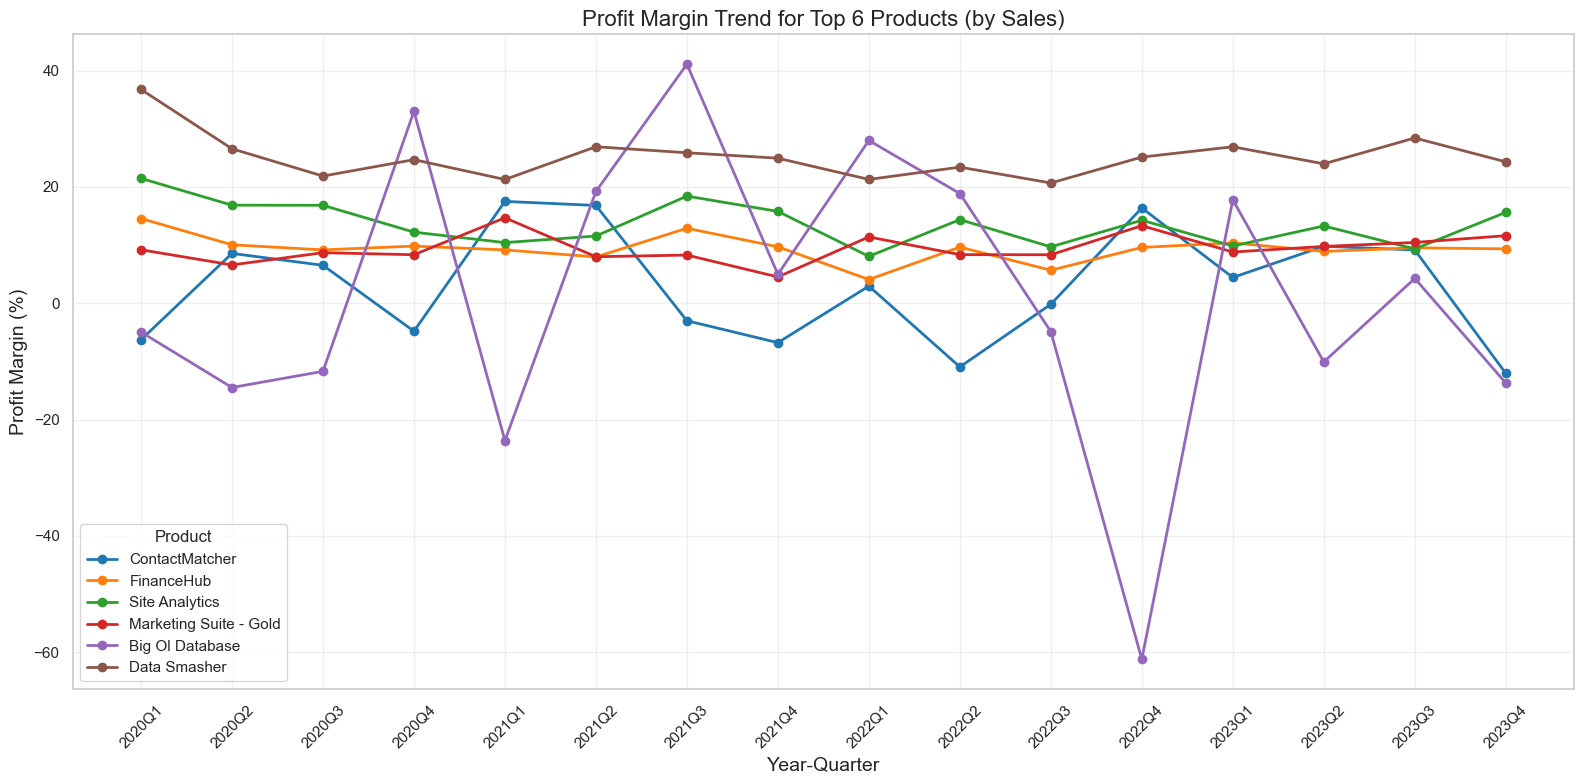

In [19]:

# 6. Visualisasi tren profitabilitas produk dari waktu ke waktu
def plot_product_profitability_trend(time_metrics, top_n=6):
    # Mendapatkan top N produk berdasarkan total penjualan
    top_products = df.groupby('Product')['Sales'].sum().nlargest(top_n).index.tolist()
    
    # Filter data untuk top N produk
    filtered_metrics = time_metrics[time_metrics['Product'].isin(top_products)]

    # Daftar warna yang berbeda untuk setiap produk
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
            '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

    plt.figure(figsize=(16, 8))

    for i, product in enumerate(top_products):
        product_data = filtered_metrics[filtered_metrics['Product'] == product]
        plt.plot(product_data['YearQuarter'], product_data['Profit_Margin'], 
                marker='o', linewidth=2, label=product, color=colors[i])

    plt.title(f'Profit Margin Trend for Top {top_n} Products (by Sales)', fontsize=16)
    plt.xlabel('Year-Quarter', fontsize=14)
    plt.ylabel('Profit Margin (%)', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.legend(title='Product')
    plt.xticks(rotation=45)
    plt.tight_layout()

    return plt.show()

# Membuat variabel time_metrics dari DataFrame utama
# Pastikan df sudah memiliki kolom 'Order Date' dengan format datetime
df['YearQuarter'] = df['Order Date'].dt.to_period('Q').astype(str)

# Mengelompokkan berdasarkan kuartal dan produk
time_metrics = df.groupby(['YearQuarter', 'Product']).agg({
    'Sales': 'sum',
    'Profit': 'sum'
}).reset_index()

# Menghitung margin profit
time_metrics['Profit_Margin'] = (time_metrics['Profit'] / time_metrics['Sales']) * 100

# Sekarang panggil fungsi dengan variabel yang sudah dibuat
plot_product_profitability_trend(time_metrics, top_n=6)


<div class="alert alert-info">

**INSIGHT:**
- Data Smasher: stabil (20-35%) dengan performa konsisten positif sepanjang periode 
- Big Ol Database: sangat volatil (+40% hingga -60%), menunjukkan risiko sangat tinggi dengan fluktuasi ekstrim 
- ContactMatcher: fluktuatif (15% hingga -10%) tanpa pola musiman yang jelas 
- FinanceHub: konsisten bermargin rendah (5-10%) 
- Site Analytics: relatif stabil dengan margin menengah (10-20%) 
- Marketing Suite - Gold: konsisten bermargin rendah (5-15%)
Dari insight di atas terlihat sekali permasalahan pada produk Big Ol Database, dimana pada tahun 2021 Q1 dan 2022 Q4 terjadi penurunan profit margin yang sangat besar yaitu mencapai 60% padahal termasuk produk dengan penjulan tertinggi. 

Dari insight di atas terlihat sekali permasalahan pada produk Big Ol Database, dimana pada tahun 2021 Q1 dan 2022 Q4 terjadi penurunan profit margin yang sangat besar yaitu mencapai 60% padahal termasuk produk dengan penjulan tertinggi. 

## </span><span style='color:#008ECC'>Produk Big Ol Database</span>

<div class="alert alert-info">

Big Ol Database adalah layanan SaaS (Software as a Service) untuk pengelolaan basis data besar, cocok untuk perusahaan yang membutuhkan kapasitas penyimpanan dan analitik data tinggi.

In [ ]:
# Memisahkan data untuk produk "Big Ol Database"
big_ol_df = df[df['Product'] == 'Big Ol Database'].copy()

In [ ]:
# Memisahkann data numerik
numeric_columns = ['Sales', 'Quantity', 'Discount', 'Profit', 'Profit_Margin', 
                       'SalesPerUnit', 'ProfitPerUnit', 'Year']
numeric_columns

['Sales',
 'Quantity',
 'Discount',
 'Profit',
 'Profit_Margin',
 'SalesPerUnit',
 'ProfitPerUnit',
 'Year']

In [22]:
# 3. Matriks Korelasi Pearson
corr_matrix = big_ol_df[numeric_columns].corr()
print("\n===== MATRIKS KORELASI ANTAR VARIABEL =====")
print(corr_matrix.round(2))


===== MATRIKS KORELASI ANTAR VARIABEL =====
               Sales  Quantity  Discount  Profit  Profit_Margin  SalesPerUnit  \
Sales           1.00      0.28     -0.14   -0.00           0.10          0.89   
Quantity        0.28      1.00     -0.16    0.05           0.08          0.02   
Discount       -0.14     -0.16      1.00   -0.58          -0.90         -0.17   
Profit         -0.00      0.05     -0.58    1.00           0.60          0.03   
Profit_Margin   0.10      0.08     -0.90    0.60           1.00          0.11   
SalesPerUnit    0.89      0.02     -0.17    0.03           0.11          1.00   
ProfitPerUnit   0.03      0.01     -0.58    0.92           0.61          0.10   
Year           -0.11     -0.00     -0.02   -0.04          -0.04         -0.06   

               ProfitPerUnit  Year  
Sales                   0.03 -0.11  
Quantity                0.01 -0.00  
Discount               -0.58 -0.02  
Profit                  0.92 -0.04  
Profit_Margin           0.61 -0.04  
Sal

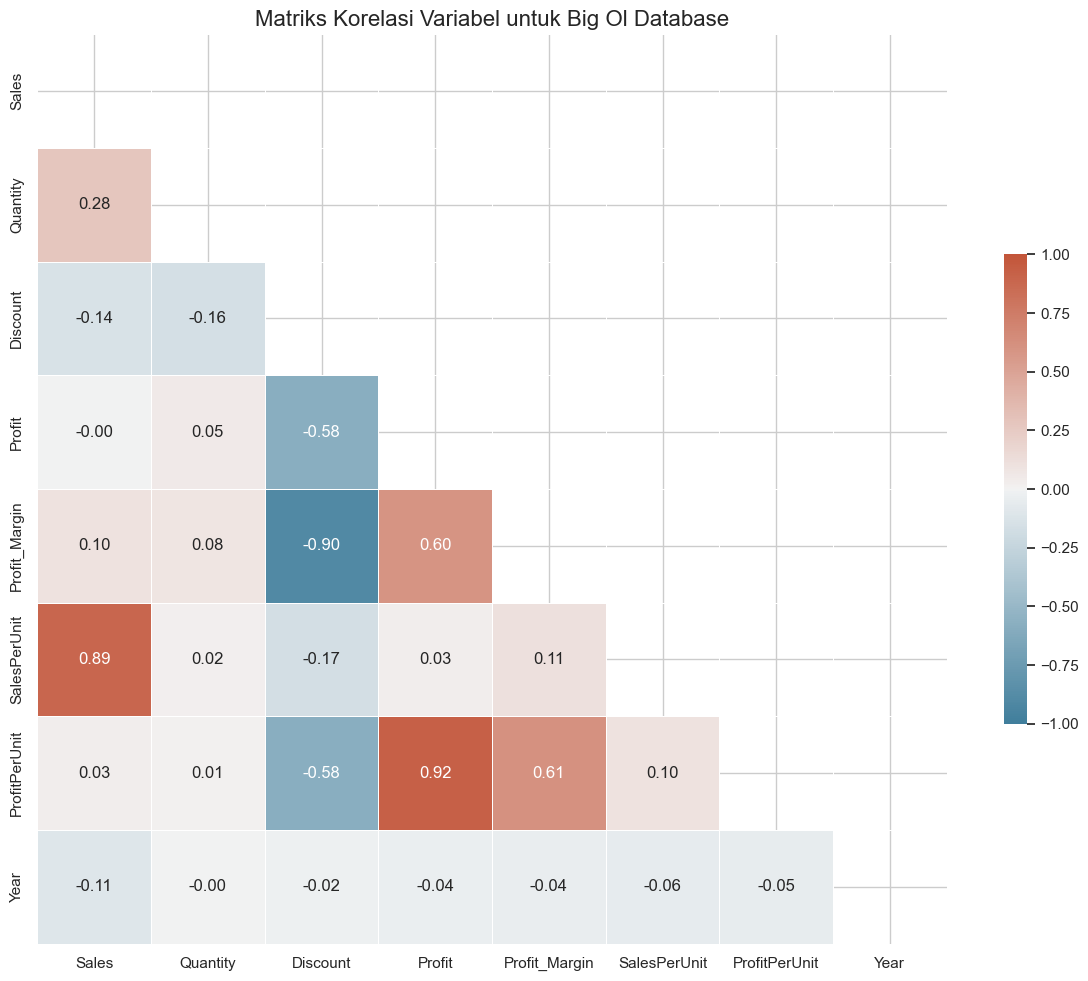

In [23]:
# 4. Visualisasi Matriks Korelasi
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            annot=True, fmt='.2f', square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Matriks Korelasi Variabel untuk Big Ol Database', fontsize=16)
plt.tight_layout()
plt.show()

<div class="alert alert-info">

**INSIGHT:**

- Korelasi Negatif Kuat Diskon-Profit Margin: Nilai korelasi -0,90 menunjukkan hubungan negatif sangat kuat antara diskon dan profit margin, mengindikasikan bahwa peningkatan diskon sangat merusak profitabilitas. 
- Diskon Menurunkan Profit: Korelasi negatif moderat (-0,58) antara diskon dan profit menunjukkan bahwa diskon secara konsisten mengurangi keuntungan absolut. 
- Kuantitas Tidak Mempengaruhi Margin: Korelasi lemah (0,08) antara quantity dan profit margin menunjukkan volume penjualan hampir tidak berpengaruh pada profitabilitas relatif. 
- Profit Per Unit Menentukan Profit Total: Korelasi sangat kuat (0,92) antara profit per unit dan profit total menunjukkan bahwa profitabilitas per transaksi lebih krusial daripada volume. 
- Sales Per Unit berkorelasi negative dengan discount: walaupun diskonnya tinggi tetapi sales nya tidak naik terlihat dari korelasi negative yaitu -0.17
- Sales Ditentukan oleh Nilai Per Unit: Korelasi kuat (0,89) antara sales dan sales per unit mengindikasikan bahwa nilai transaksi individual sangat menentukan pendapatan total

Statistik per kategori diskon:
  Discount_Category  count        mean   median
0             0-10%     31  570.844581  258.950
1            10-20%     31  391.871484  279.200
2            20-30%      5  296.601200  300.265
3            30-40%     13  339.894923  199.770
4            40-50%     12  745.961250  336.175
5              50%+     23  173.398304  113.997

Menggunakan kategori 0-10% sebagai baseline (median: 258.95)

Hasil perbandingan kategori diskon dengan baseline (0-10%):
  Kategori  Samples   Median vs. Baseline   p-value Signifikan Arah Pengaruh
0   10-20%       31  279.200       ↑ 7.8%  0.499083      Tidak       Positif
1   20-30%        5  300.265      ↑ 16.0%  0.963501      Tidak       Positif
2   30-40%       13  199.770      ↓ 22.9%  0.897628      Tidak       Negatif
3   40-50%       12  336.175      ↑ 29.8%  0.796951      Tidak       Positif
4     50%+       23  113.997      ↓ 56.0%  0.008680         Ya       Negatif


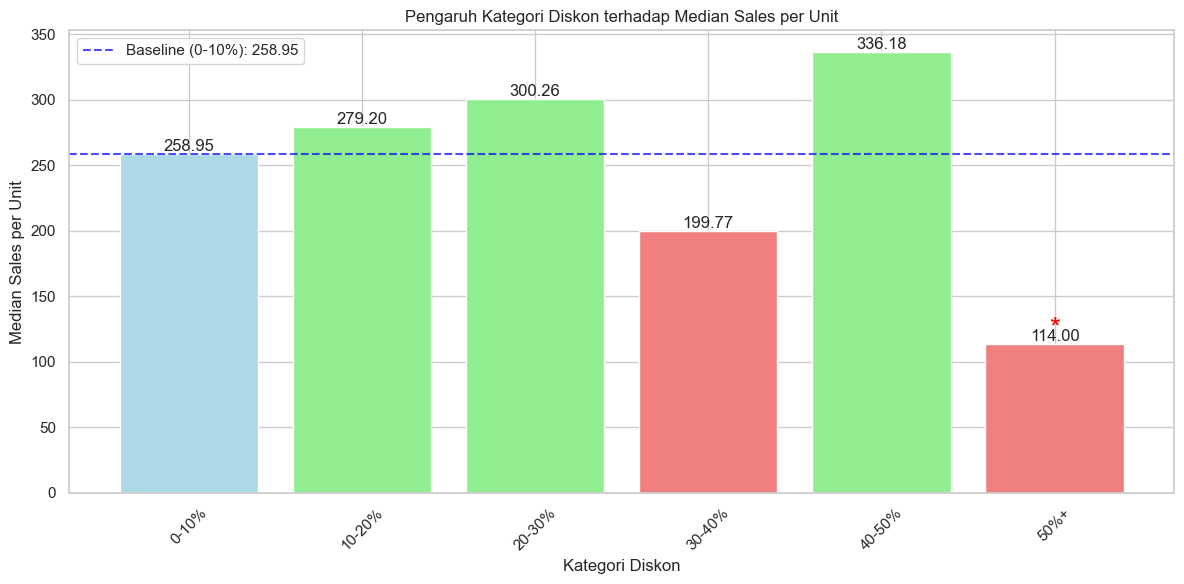


Visualisasi telah disimpan sebagai 'discount_effect.png'

Kesimpulan:
Tolak H0: Kategori diskon berpengaruh signifikan terhadap sales per unit

Detail pengaruh yang signifikan:
- Kategori 50%+ berpengaruh negatif ↓ 56.0% terhadap sales per unit (p-value: 0.0087)


In [24]:

# Menghitung Sales per Unit
big_ol_df['SalesPerUnit'] = big_ol_df['Sales'] / big_ol_df['Quantity']
big_ol_df = big_ol_df.replace([float('inf'), -float('inf')], float('nan')).dropna(subset=['SalesPerUnit', 'Discount'])

# Membuat kategori diskon dalam kelipatan 10%
big_ol_df.loc[big_ol_df['Discount'] <= 0.1, 'Discount_Category'] = '0-10%'
big_ol_df.loc[(big_ol_df['Discount'] > 0.1) & (big_ol_df['Discount'] <= 0.2), 'Discount_Category'] = '10-20%'
big_ol_df.loc[(big_ol_df['Discount'] > 0.2) & (big_ol_df['Discount'] <= 0.3), 'Discount_Category'] = '20-30%'
big_ol_df.loc[(big_ol_df['Discount'] > 0.3) & (big_ol_df['Discount'] <= 0.4), 'Discount_Category'] = '30-40%'
big_ol_df.loc[(big_ol_df['Discount'] > 0.4) & (big_ol_df['Discount'] <= 0.5), 'Discount_Category'] = '40-50%'
big_ol_df.loc[big_ol_df['Discount'] > 0.5, 'Discount_Category'] = '50%+'

# Tampilkan jumlah data dan statistik per kategori diskon
stats_summary = big_ol_df.groupby('Discount_Category')['SalesPerUnit'].agg(['count', 'mean', 'median']).reset_index()
stats_summary = stats_summary.sort_values('Discount_Category')
print("Statistik per kategori diskon:")
print(stats_summary)

# Definisi hipotesis
H0 = 'Kategori diskon tidak berpengaruh signifikan terhadap sales per unit'
Ha = 'Kategori diskon berpengaruh signifikan terhadap sales per unit'

# Dapatkan kategori dengan minimal 5 data
valid_categories = stats_summary[stats_summary['count'] >= 5]['Discount_Category'].tolist()

# Gunakan kategori dengan diskon terendah sebagai baseline/referensi
if '0-10%' in valid_categories:
    baseline_category = '0-10%'
    baseline_data = big_ol_df[big_ol_df['Discount_Category'] == baseline_category]['SalesPerUnit']
    baseline_median = baseline_data.median()
    
    print(f"\nMenggunakan kategori {baseline_category} sebagai baseline (median: {baseline_median:.2f})")
    
    # Bandingkan setiap kategori diskon dengan baseline
    comparison_results = []
    
    for category in valid_categories:
        if category != baseline_category:
            # Data untuk kategori yang dibandingkan
            category_data = big_ol_df[big_ol_df['Discount_Category'] == category]['SalesPerUnit']
            category_median = category_data.median()
            
            # Uji Mann-Whitney U
            u_stat, p_value = mannwhitneyu(baseline_data, category_data, alternative='two-sided')
            
            # Tentukan arah pengaruh
            if category_median > baseline_median:
                effect_direction = "Positif"
                effect_symbol = "↑"
            else:
                effect_direction = "Negatif"
                effect_symbol = "↓"
            
            # Hitung persentase perbedaan
            pct_diff = (category_median - baseline_median) / baseline_median * 100
            
            # Simpan hasil
            comparison_results.append({
                'Kategori': category,
                'Samples': len(category_data),
                'Median': category_median,
                'vs. Baseline': f"{effect_symbol} {abs(pct_diff):.1f}%",
                'p-value': p_value,
                'Signifikan': 'Ya' if p_value < 0.05 else 'Tidak',
                'Arah Pengaruh': effect_direction
            })
    
    # Tampilkan hasil
    if comparison_results:
        results_df = pd.DataFrame(comparison_results).sort_values('Kategori')
        print("\nHasil perbandingan kategori diskon dengan baseline (0-10%):")
        print(results_df)
        
        # Visualisasi pengaruh diskon terhadap sales per unit
        plt.figure(figsize=(12, 6))
        
        # Data untuk plot
        all_medians = stats_summary.set_index('Discount_Category')['median']
        all_categories = all_medians.index.tolist()
        
        # Plot median per kategori
        bars = plt.bar(all_categories, all_medians, color=[
            'lightblue' if cat == baseline_category else 
            'lightgreen' if all_medians[cat] > baseline_median else 
            'lightcoral' for cat in all_categories
        ])
        
        # Tambahkan label nilai di atas bar
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.2f}',
                    ha='center', va='bottom')
        
        # Tambahkan garis baseline
        plt.axhline(y=baseline_median, color='blue', linestyle='--', alpha=0.7, 
                   label=f'Baseline ({baseline_category}): {baseline_median:.2f}')
        
        # Label signifikansi
        for i, cat in enumerate(all_categories):
            if cat != baseline_category:
                result = results_df[results_df['Kategori'] == cat]
                if not result.empty and result['Signifikan'].values[0] == 'Ya':
                    plt.text(i, all_medians[cat] * 1.05, '*', 
                            fontsize=20, ha='center', color='red')
        
        plt.title('Pengaruh Kategori Diskon terhadap Median Sales per Unit')
        plt.xlabel('Kategori Diskon')
        plt.ylabel('Median Sales per Unit')
        plt.legend()
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.savefig('discount_effect.png')
        plt.show()
        plt.close()
        
        print("\nVisualisasi telah disimpan sebagai 'discount_effect.png'")
        
        # Kesimpulan keseluruhan
        significant_results = results_df[results_df['Signifikan'] == 'Ya']
        if len(significant_results) > 0:
            print("\nKesimpulan:")
            print("Tolak H0:", Ha)
            print("\nDetail pengaruh yang signifikan:")
            for _, row in significant_results.iterrows():
                print(f"- Kategori {row['Kategori']} berpengaruh {row['Arah Pengaruh'].lower()} {row['vs. Baseline']} terhadap sales per unit (p-value: {row['p-value']:.4f})")
        else:
            print("\nKesimpulan:")
            print("Gagal tolak H0:", H0)
            print("Tidak ada kategori diskon yang berpengaruh signifikan terhadap sales per unit dibandingkan dengan baseline (0-10%)")
    else:
        print("Tidak ada kategori diskon valid untuk dibandingkan dengan baseline")
else:
    print(f"Kategori baseline (0-10%) tidak memiliki cukup data (minimal 5)")

<div class="alert alert-info">

**Insight:**
Dari hasil korelasi product Big Ol Datbase tersebut terlihat bahwa korelasi antara discount dengan profit margin itu sangat kuat yaitu -0.90 mendekati 1, artinya ketika discount naik profit margin turun. Dan yang sangat mengkhawatirkan bahwa korelasi anatar discount dengan sales per unit itu juga -0.17, walaupun memperlihatkan hubungan yang tidak begitu kuat tetapi hubungannya negatif, ini artinya bahwa discount naik salesnya tidak naik atau bisa juga turun. Dan setelah dilihat menggunakan uji statistika kruskal wallis variabel SalesPerUnit dengan Kategori Discount berpengaruh signifikan.

In [25]:
import pandas as pd
import numpy as np

# Misalkan big_ol_df sudah ada
# Grouping berdasarkan YearQuarter
quarterly = big_ol_df.groupby('YearQuarter').agg({
    'Discount': 'mean',
    'Profit_Margin': 'mean',
    'Sales': 'sum',
    'Profit': 'sum',
    'Order ID': 'count'
}).reset_index()

# Mengurutkan kuartal
quarterly['Year'] = quarterly['YearQuarter'].str[:4].astype(int)  # Ambil 4 karakter pertama untuk tahun
quarterly['Q'] = quarterly['YearQuarter'].str[5:].astype(int)     # Ambil karakter setelah 'Q' untuk kuartal
quarterly = quarterly.sort_values(['Year', 'Q'])

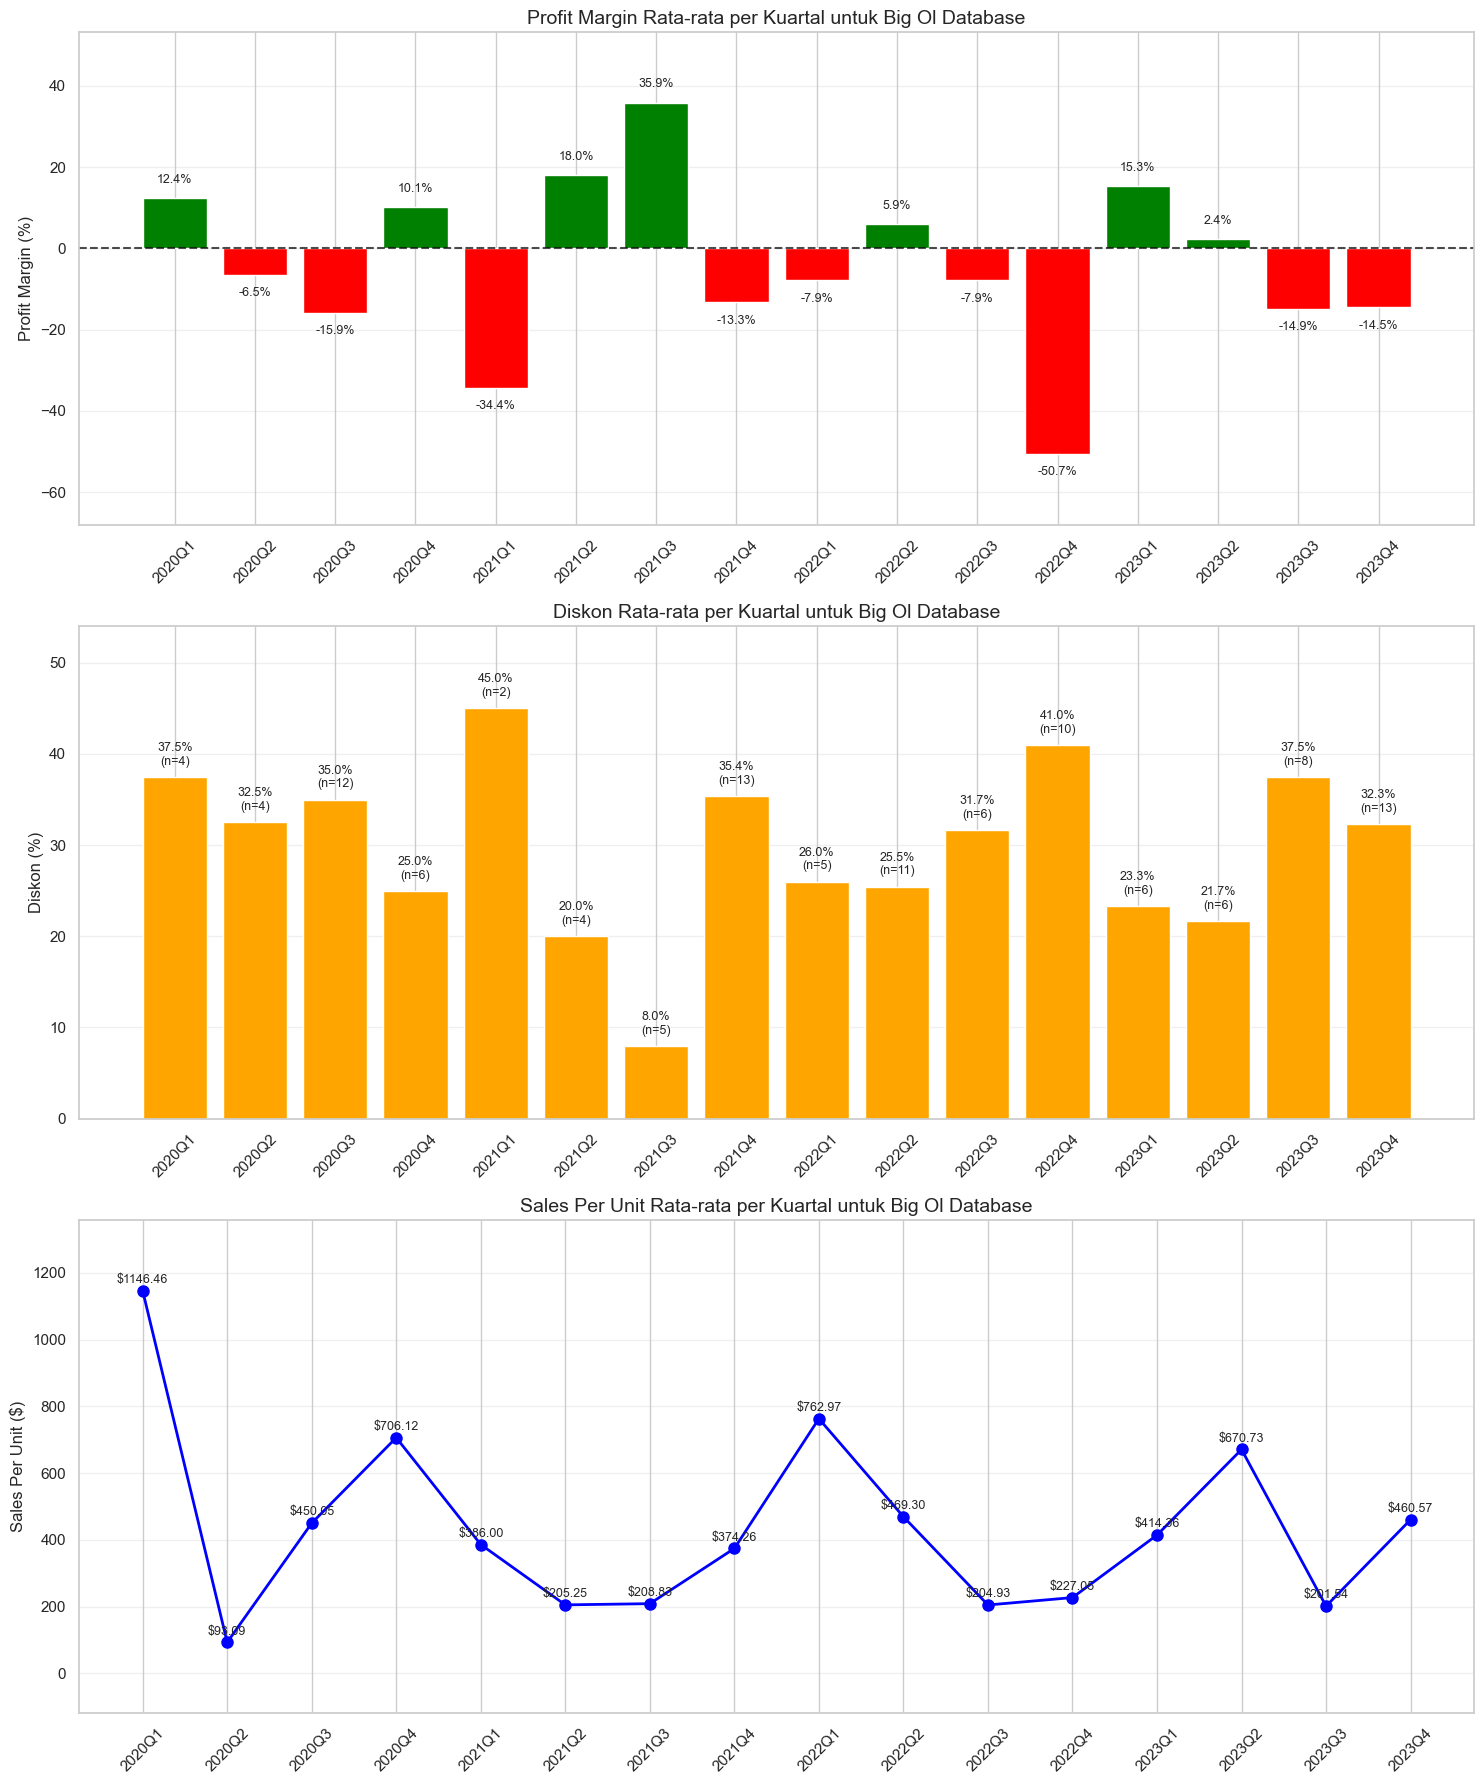

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Misalkan big_ol_df sudah ada
# Grouping berdasarkan YearQuarter
quarterly = big_ol_df.groupby('YearQuarter').agg({
    'Discount': 'mean',
    'Profit_Margin': 'mean',
    'Sales': 'sum',
    'Profit': 'sum',
    'Order ID': 'count',
    'SalesPerUnit': 'mean',  # Tambahkan perhitungan SalesPerUnit
    'Quantity': 'sum'        # Tambahkan Quantity untuk perhitungan alternatif
}).reset_index()

# Mengurutkan kuartal
quarterly['Year'] = quarterly['YearQuarter'].str[:4].astype(int)  # Ambil 4 karakter pertama untuk tahun
quarterly['Q'] = quarterly['YearQuarter'].str[5:].astype(int)     # Ambil karakter setelah 'Q' untuk kuartal
quarterly = quarterly.sort_values(['Year', 'Q'])

# Alternatif perhitungan SalesPerUnit jika tidak ada kolom langsung di dataset
quarterly['CalcSalesPerUnit'] = quarterly['Sales'] / quarterly['Quantity']

# Langkah 3: Visualisasi
plt.figure(figsize=(15, 18))  # Menambah tinggi untuk 3 subplot

# Subplot 1: Profit Margin
plt.subplot(3, 1, 1)
bars = plt.bar(quarterly['YearQuarter'], quarterly['Profit_Margin'], 
               color=quarterly['Profit_Margin'].apply(lambda x: 'green' if x >= 0 else 'red'))

# Tambahkan label pada setiap bar
for bar in bars:
    height = bar.get_height()
    offset = 3 if height >= 0 else -3  # Offset untuk label
    plt.text(bar.get_x() + bar.get_width()/2, 
             height + offset,
             f'{height:.1f}%',
             ha='center', 
             va='bottom' if height >= 0 else 'top',
             fontsize=9)

# Tambahkan garis horizontal pada y=0
plt.axhline(y=0, color='black', linestyle='--', alpha=0.7)
plt.title('Profit Margin Rata-rata per Kuartal untuk Big Ol Database', fontsize=14)
plt.ylabel('Profit Margin (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.margins(y=0.2)  # Tambahkan padding pada sumbu y

# Subplot 2: Diskon
plt.subplot(3, 1, 2)
bars = plt.bar(quarterly['YearQuarter'], quarterly['Discount'] * 100, color='orange')

# Kemudian pada label juga perlu disesuaikan
for i, bar in enumerate(bars):
    height = bar.get_height()
    count = quarterly.iloc[i]['Order ID']
    plt.text(bar.get_x() + bar.get_width()/2, 
             height + 1,  # Sesuaikan offset karena nilai sekarang lebih besar
             f'{height:.1f}%\n(n={count})',
             ha='center', 
             va='bottom', 
             fontsize=9)

plt.title('Diskon Rata-rata per Kuartal untuk Big Ol Database', fontsize=14)
plt.ylabel('Diskon (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.margins(y=0.2)  # Tambahkan padding pada sumbu y

# Subplot 3: Sales Per Unit (BARU)
plt.subplot(3, 1, 3)

# Gunakan kolom SalesPerUnit jika tersedia di dataset, jika tidak gunakan perhitungan alternatif
sales_per_unit = quarterly['SalesPerUnit'] if 'SalesPerUnit' in quarterly.columns else quarterly['CalcSalesPerUnit']

# Buat line chart untuk Sales Per Unit
plt.plot(quarterly['YearQuarter'], sales_per_unit, 'bo-', linewidth=2, markersize=8)

# Tambahkan label nilai pada setiap titik
for i, value in enumerate(sales_per_unit):
    plt.text(i, value + (max(sales_per_unit) * 0.02),  # Tambahkan offset 2% dari nilai maksimum
             f'${value:.2f}',
             ha='center',
             fontsize=9)

plt.title('Sales Per Unit Rata-rata per Kuartal untuk Big Ol Database', fontsize=14)
plt.ylabel('Sales Per Unit ($)')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.margins(y=0.2)  # Tambahkan padding pada sumbu y

# Atur layout agar tidak tumpang tindih
plt.tight_layout()

# Tampilkan grafik
plt.show()

<div class="alert alert-info">

**Insight tentang Profit Margin:**
1.	Volatilitas Ekstrim - Profit margin sangat fluktuatif, berkisar dari +35.9% (2021 Q3) hingga -50.7% (2022 Q4). Ini menunjukkan ketidakstabilan profitabilitas produk.
2.	Pola Negatif-Positif Bergantian - Terdapat pola bergantian antara kuartal dengan profit margin positif dan negatif, menunjukkan inkonsistensi performa.
3.	Dua Titik Penurunan Terburuk - Penurunan terburuk terjadi pada: 
    - 2022 Q4 (-50.7%) - Penurunan paling drastis
    - 2021 Q1 (-34.4%) - Penurunan signifikan kedua
4.	Performa Terbaik - Profit margin tertinggi dicapai pada 2021 Q3 (35.9%), diikuti 2021 Q2 (18.0%) dan 2023 Q1 (15.3%).

**Insight tentang Discount:**

1.	Korelasi Diskon-Profit - Terlihat pola yang jelas antara tingkat diskon dan profit margin:
    - Kuartal dengan diskon tertinggi (2021 Q1: 45.0% dan 2022 Q4: 41.0%) adalah kuartal dengan kerugian terbesar
    - Kuartal dengan diskon terendah (2021 Q3: 8.0%) memiliki profit margin tertinggi (35.9%)
2.	Diskon di 2021 Q1 - Meskipun hanya memiliki 2 transaksi, rata-rata diskon sangat tinggi (45.0%), yang berkorelasi dengan profit margin negatif (-34.4%).
3.	Diskon di 2022 Q4 - Dengan 10 transaksi dan diskon rata-rata 41.0%, menghasilkan profit margin terburuk (-50.7%).
4.	Range Diskon - Diskon bervariasi dari 8.0% hingga 45.0%, dengan kebanyakan kuartal memberikan diskon di atas 30%.

**Insight tentang Sales Per Unit:**

- Volatilitas tinggi sepanjang 2020-2023, dengan puncak tertinggi di 2020Q1 ($1146.46) 
- Pola siklus berulang: Q1 dan Q4 cenderung tinggi, Q2 dan Q3 cenderung rendah 
- Tiga titik terendah di 2020Q2 ($94.15), 2022Q3 ($227.06), dan 2023Q3 ($212.99) 
- Konsisten menunjukkan pemulihan setelah mencapai titik rendah 
- Q4 hampir selalu menunjukkan peningkatan dibandingkan Q3, mengindikasikan faktor musiman 
- Pola fluktuasi ini dapat dimanfaatkan untuk perencanaan strategis dan antisipasi pasar


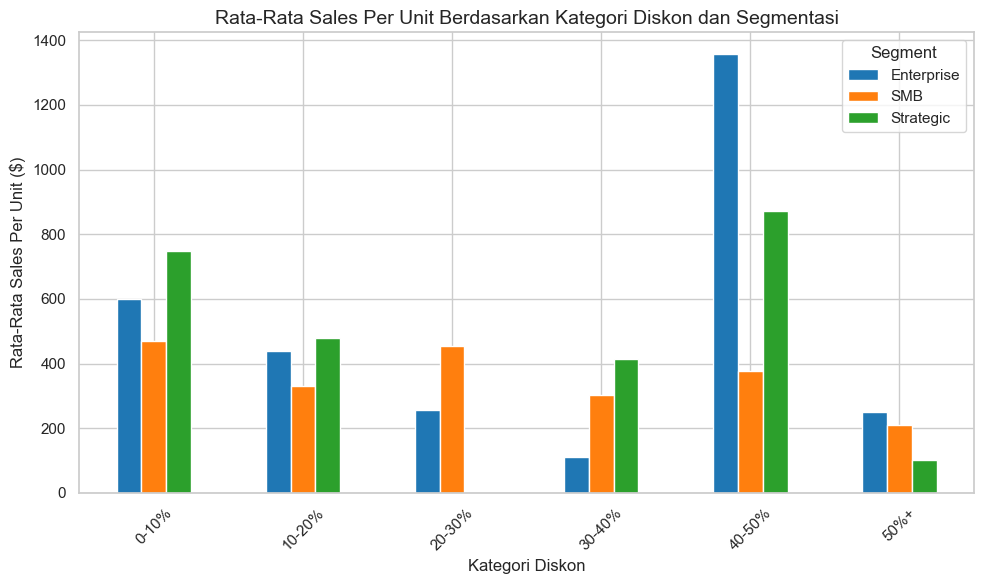

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat kolom Discount_Category
big_ol_df.loc[big_ol_df['Discount'] <= 0.1, 'Discount_Category'] = '0-10%'
big_ol_df.loc[(big_ol_df['Discount'] > 0.1) & (big_ol_df['Discount'] <= 0.2), 'Discount_Category'] = '10-20%'
big_ol_df.loc[(big_ol_df['Discount'] > 0.2) & (big_ol_df['Discount'] <= 0.3), 'Discount_Category'] = '20-30%'
big_ol_df.loc[(big_ol_df['Discount'] > 0.3) & (big_ol_df['Discount'] <= 0.4), 'Discount_Category'] = '30-40%'
big_ol_df.loc[(big_ol_df['Discount'] > 0.4) & (big_ol_df['Discount'] <= 0.5), 'Discount_Category'] = '40-50%'
big_ol_df.loc[big_ol_df['Discount'] > 0.5, 'Discount_Category'] = '50%+'

# Menghitung Sales Per Unit (Sales / Quantity)
big_ol_df['SalesPerUnit'] = big_ol_df['Sales'] / big_ol_df['Quantity']

# Mengelompokkan data berdasarkan Discount_Category dan Segment, lalu menghitung rata-rata SalesPerUnit
segment_discount_sales = big_ol_df.groupby(['Discount_Category', 'Segment'])['SalesPerUnit'].mean().unstack()

# Urutkan kategori diskon agar tampil berurutan
category_order = ['0-10%', '10-20%', '20-30%', '30-40%', '40-50%', '50%+']
segment_discount_sales = segment_discount_sales.reindex(category_order)

# Membuat grouped bar chart (lebih cocok untuk rata-rata SalesPerUnit daripada stacked bar chart)
segment_discount_sales.plot(kind='bar', figsize=(10, 6), color=['#1f77b4', '#ff7f0e', '#2ca02c'])

# Menambahkan label dan judul
plt.title('Rata-Rata Sales Per Unit Berdasarkan Kategori Diskon dan Segmentasi', fontsize=14)
plt.xlabel('Kategori Diskon', fontsize=12)
plt.ylabel('Rata-Rata Sales Per Unit ($)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Segment', loc='upper right')
plt.tight_layout()

# Menampilkan plot
plt.show()

<div class="alert alert-info">

**Insight dari Visualisasi Rata-Rata Sales Per Unit:**

- Segmen Enterprise mencapai puncak penjualan pada diskon 40-50% (±1350 unit).
- Segmen Strategic berkinerja baik pada diskon 0-10% (±750 unit) dan 40-50% (±850 unit).
- Segmen SMB menunjukkan penjualan yang lebih stabil di semua kategori diskon, dengan kinerja terbaik pada 0-10%.
- Diskon tertinggi (50%+) menghasilkan penjualan terendah di semua segmen.
- Tiap segmen memiliki respons berbeda terhadap diskon, mengindikasikan perlunya strategi diskon yang disesuaikan per segmen.

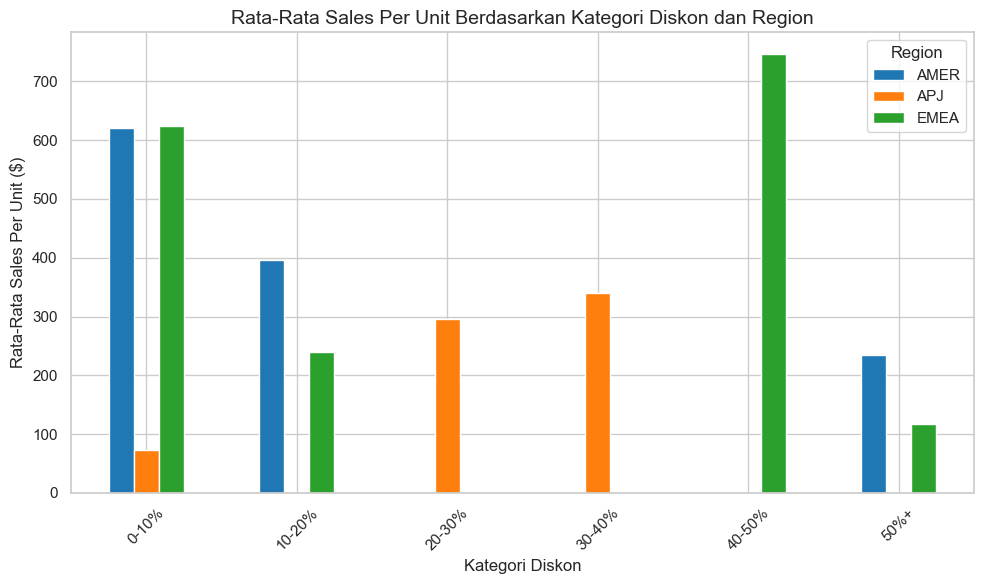

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat kolom Discount_Category
big_ol_df.loc[big_ol_df['Discount'] <= 0.1, 'Discount_Category'] = '0-10%'
big_ol_df.loc[(big_ol_df['Discount'] > 0.1) & (big_ol_df['Discount'] <= 0.2), 'Discount_Category'] = '10-20%'
big_ol_df.loc[(big_ol_df['Discount'] > 0.2) & (big_ol_df['Discount'] <= 0.3), 'Discount_Category'] = '20-30%'
big_ol_df.loc[(big_ol_df['Discount'] > 0.3) & (big_ol_df['Discount'] <= 0.4), 'Discount_Category'] = '30-40%'
big_ol_df.loc[(big_ol_df['Discount'] > 0.4) & (big_ol_df['Discount'] <= 0.5), 'Discount_Category'] = '40-50%'
big_ol_df.loc[big_ol_df['Discount'] > 0.5, 'Discount_Category'] = '50%+'

# Menghitung Sales Per Unit (Sales / Quantity)
big_ol_df['SalesPerUnit'] = big_ol_df['Sales'] / big_ol_df['Quantity']

# Mengelompokkan data berdasarkan Discount_Category dan Region, lalu menghitung rata-rata SalesPerUnit
region_discount_sales = big_ol_df.groupby(['Discount_Category', 'Region'])['SalesPerUnit'].mean().unstack()

# Urutkan kategori diskon agar tampil berurutan
category_order = ['0-10%', '10-20%', '20-30%', '30-40%', '40-50%', '50%+']
region_discount_sales_discount_sales = region_discount_sales.reindex(category_order)

# Membuat grouped bar chart (lebih cocok untuk rata-rata SalesPerUnit daripada stacked bar chart)
region_discount_sales.plot(kind='bar', figsize=(10, 6), color=['#1f77b4', '#ff7f0e', '#2ca02c'])

# Menambahkan label dan judul
plt.title('Rata-Rata Sales Per Unit Berdasarkan Kategori Diskon dan Region', fontsize=14)
plt.xlabel('Kategori Diskon', fontsize=12)
plt.ylabel('Rata-Rata Sales Per Unit ($)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Region', loc='upper right')
plt.tight_layout()

# Menampilkan plot
plt.show()

<div class="alert alert-info">

**Insight Rata-Rata Sales Per Unit Berdasarkan Region dan Diskon:**

- Region EMEA menunjukkan performa tertinggi pada diskon 40-50% (±750 unit) dan juga kuat pada diskon 0-10% (±620 unit).
- Region AMER memiliki penjualan tertinggi pada diskon rendah 0-10% (±620 unit) dan 10-20% (±390 unit), dengan kecenderungan menurun seiring peningkatan diskon.
- Region APJ hanya menunjukkan penjualan pada diskon 20-30% (±290 unit) dan 30-40% (±330 unit), tanpa respons pada kategori diskon lainnya.

**Tiap region memiliki pola respons yang berbeda terhadap diskon:**
- EMEA: Sangat responsif pada diskon 40-50%
- AMER: Lebih efektif dengan diskon rendah
- APJ: Hanya efektif pada rentang diskon menengah


Diskon 40-50% sangat efektif untuk EMEA namun tidak ada penjualan di region lain pada kategori ini.
Struktur pasar tiap region memerlukan strategi diskon yang berbeda untuk hasil optimal.

In [92]:
import pandas as pd
import numpy as np
from scipy.stats import kruskal
import warnings
warnings.filterwarnings('ignore')

# Membaca data
big_ol_df = pd.read_csv('big_ol_db.csv')

# Hitung SalesPerUnit dan bersihkan data
big_ol_df['SalesPerUnit'] = big_ol_df['Sales'] / big_ol_df['Quantity']
big_ol_df = big_ol_df.replace([float('inf'), -float('inf')], float('nan')).dropna(subset=['SalesPerUnit'])

# Hitung Efisiensi Diskon
big_ol_df['DiscountEfficiency'] = big_ol_df['SalesPerUnit'] / (big_ol_df['Discount'] + 0.0001)
big_ol_df.loc[big_ol_df['Discount'] < 0.01, 'DiscountEfficiency'] = big_ol_df['SalesPerUnit'] * 100

# Kategorisasi Diskon
big_ol_df.loc[big_ol_df['Discount'] <= 0.1, 'Discount_Category'] = '0-10%'
big_ol_df.loc[(big_ol_df['Discount'] > 0.1) & (big_ol_df['Discount'] <= 0.2), 'Discount_Category'] = '10-20%'
big_ol_df.loc[(big_ol_df['Discount'] > 0.2) & (big_ol_df['Discount'] <= 0.3), 'Discount_Category'] = '20-30%'
big_ol_df.loc[(big_ol_df['Discount'] > 0.3) & (big_ol_df['Discount'] <= 0.4), 'Discount_Category'] = '30-40%'
big_ol_df.loc[(big_ol_df['Discount'] > 0.4) & (big_ol_df['Discount'] <= 0.5), 'Discount_Category'] = '40-50%'
big_ol_df.loc[big_ol_df['Discount'] > 0.5, 'Discount_Category'] = '50%+'

# Kategorisasi Efisiensi Diskon
efficiency_percentiles = big_ol_df['DiscountEfficiency'].quantile([0, 0.2, 0.4, 0.6, 0.8, 1.0]).tolist()
efficiency_labels = ['Sangat Rendah', 'Rendah', 'Sedang', 'Tinggi', 'Sangat Tinggi']
big_ol_df['Efficiency_Category'] = pd.cut(big_ol_df['DiscountEfficiency'], bins=efficiency_percentiles, labels=efficiency_labels, include_lowest=True)

# Uji Kruskal-Wallis
# 1. Berdasarkan Kategori Diskon
discount_order = ['0-10%', '10-20%', '20-30%', '30-40%', '40-50%', '50%+']
discount_groups = [big_ol_df[big_ol_df['Discount_Category'] == cat]['SalesPerUnit'].values 
                  for cat in discount_order if sum(big_ol_df['Discount_Category'] == cat) > 0]
sales_kw_stat, sales_kw_p = kruskal(*discount_groups)
print(f"Uji Kruskal-Wallis SalesPerUnit berdasarkan Kategori Diskon: stat={sales_kw_stat:.4f}, p-value={sales_kw_p:.4f}")
print(f"Kesimpulan: Kategori Diskon {'berpengaruh signifikan' if sales_kw_p < 0.05 else 'tidak berpengaruh signifikan'} terhadap SalesPerUnit")

efficiency_groups = [big_ol_df[big_ol_df['Discount_Category'] == cat]['DiscountEfficiency'].values 
                    for cat in discount_order if sum(big_ol_df['Discount_Category'] == cat) > 0]
eff_kw_stat, eff_kw_p = kruskal(*efficiency_groups)
print(f"Uji Kruskal-Wallis DiscountEfficiency berdasarkan Kategori Diskon: stat={eff_kw_stat:.4f}, p-value={eff_kw_p:.4f}")
print(f"Kesimpulan: Kategori Diskon {'berpengaruh signifikan' if eff_kw_p < 0.05 else 'tidak berpengaruh signifikan'} terhadap DiscountEfficiency")

# 2. Berdasarkan Segment
segment_groups = [big_ol_df[big_ol_df['Segment'] == seg]['SalesPerUnit'].values 
                 for seg in big_ol_df['Segment'].unique()]
seg_kw_stat, seg_kw_p = kruskal(*segment_groups)
print(f"Uji Kruskal-Wallis SalesPerUnit berdasarkan Segment: stat={seg_kw_stat:.4f}, p-value={seg_kw_p:.4f}")
print(f"Kesimpulan: Segment {'berpengaruh signifikan' if seg_kw_p < 0.05 else 'tidak berpengaruh signifikan'} terhadap SalesPerUnit")

# 3. Berdasarkan Region
region_groups = [big_ol_df[big_ol_df['Region'] == reg]['SalesPerUnit'].values 
                for reg in big_ol_df['Region'].unique()]
reg_kw_stat, reg_kw_p = kruskal(*region_groups)
print(f"Uji Kruskal-Wallis SalesPerUnit berdasarkan Region: stat={reg_kw_stat:.4f}, p-value={reg_kw_p:.4f}")
print(f"Kesimpulan: Region {'berpengaruh signifikan' if reg_kw_p < 0.05 else 'tidak berpengaruh signifikan'} terhadap SalesPerUnit")

# 4. Berdasarkan Industry (min. 5 sampel)
industry_stats = big_ol_df.groupby('Industry')['SalesPerUnit'].count()
valid_industries = industry_stats[industry_stats >= 5].index.tolist()
if len(valid_industries) >= 2:
    industry_groups = [big_ol_df[big_ol_df['Industry'] == ind]['SalesPerUnit'].values 
                      for ind in valid_industries]
    ind_kw_stat, ind_kw_p = kruskal(*industry_groups)
    print(f"Uji Kruskal-Wallis SalesPerUnit berdasarkan Industry: stat={ind_kw_stat:.4f}, p-value={ind_kw_p:.4f}")
    print(f"Kesimpulan: Industry {'berpengaruh signifikan' if ind_kw_p < 0.05 else 'tidak berpengaruh signifikan'} terhadap SalesPerUnit")

# 5. Berdasarkan Country (min. 5 sampel)
country_stats = big_ol_df.groupby('Country')['SalesPerUnit'].count()
valid_countries = country_stats[country_stats >= 5].index.tolist()
if len(valid_countries) >= 2:
    country_groups = [big_ol_df[big_ol_df['Country'] == country]['SalesPerUnit'].values 
                     for country in valid_countries]
    country_kw_stat, country_kw_p = kruskal(*country_groups)
    print(f"Uji Kruskal-Wallis SalesPerUnit berdasarkan Country: stat={country_kw_stat:.4f}, p-value={country_kw_p:.4f}")
    print(f"Kesimpulan: Country {'berpengaruh signifikan' if country_kw_p < 0.05 else 'tidak berpengaruh signifikan'} terhadap SalesPerUnit")

# 6. Berdasarkan Efisiensi Diskon
efficiency_groups = [big_ol_df[big_ol_df['Efficiency_Category'] == cat]['SalesPerUnit'].values 
                     for cat in efficiency_labels if sum(big_ol_df['Efficiency_Category'] == cat) > 0]
eff_cat_kw_stat, eff_cat_kw_p = kruskal(*efficiency_groups)
print(f"Uji Kruskal-Wallis SalesPerUnit berdasarkan Efisiensi Diskon: stat={eff_cat_kw_stat:.4f}, p-value={eff_cat_kw_p:.4f}")
print(f"Kesimpulan: Efisiensi Diskon {'berpengaruh signifikan' if eff_cat_kw_p < 0.05 else 'tidak berpengaruh signifikan'} terhadap SalesPerUnit")

Uji Kruskal-Wallis SalesPerUnit berdasarkan Kategori Diskon: stat=12.4814, p-value=0.0288
Kesimpulan: Kategori Diskon berpengaruh signifikan terhadap SalesPerUnit
Uji Kruskal-Wallis DiscountEfficiency berdasarkan Kategori Diskon: stat=74.8909, p-value=0.0000
Kesimpulan: Kategori Diskon berpengaruh signifikan terhadap DiscountEfficiency
Uji Kruskal-Wallis SalesPerUnit berdasarkan Segment: stat=1.3939, p-value=0.4981
Kesimpulan: Segment tidak berpengaruh signifikan terhadap SalesPerUnit
Uji Kruskal-Wallis SalesPerUnit berdasarkan Region: stat=0.3297, p-value=0.8480
Kesimpulan: Region tidak berpengaruh signifikan terhadap SalesPerUnit
Uji Kruskal-Wallis SalesPerUnit berdasarkan Industry: stat=9.7031, p-value=0.2865
Kesimpulan: Industry tidak berpengaruh signifikan terhadap SalesPerUnit
Uji Kruskal-Wallis SalesPerUnit berdasarkan Country: stat=10.3690, p-value=0.1686
Kesimpulan: Country tidak berpengaruh signifikan terhadap SalesPerUnit
Uji Kruskal-Wallis SalesPerUnit berdasarkan Efisiensi

<div class="alert alert-info">

**INSIGHT:**

Berdasarkan hasil uji statistika variabel Sales Per Unit dengan variabel kategori discount itu berpengaruh signifikan, sedangkan dengan variabel yang lain itu tidak berpengaruh signifikan. artinya penurunan pada Sales Per Unit ini tidak di sebabkan oleh variabel yang lain

# Rekomendasi Berdasarkan BCG Matrix Produk SaaS

## 1. STARS (High Sales, High Margin)
**Produk:** Alchemy (37.20%), Data Smasher (25.05%)

**Strategi:**
- Tingkatkan investasi pemasaran untuk Alchemy dengan target penjualan minimal $200K (peningkatan 33%)
- Dorong penjualan Data Smasher menjadi $230K (28% growth) dengan mempertahankan margin tinggi
- Maksimalkan profit per unit dan kembangkan fitur premium
- KPI: Peningkatan penjualan rata-rata 35% dalam 12 bulan dengan mempertahankan margin profit

## 2. PROBLEM CHILDREN (High Sales, Low Margin)
**Produk:** ContactMatcher (3.05%), FinanceHub (9.43%), Site Analytics (13.49%), Marketing Suite - Gold (9.51%), Big Ol Database (1.79%)

**Akar Masalah:**
- **Big Ol Database:** Margin rendah (1.79%) disebabkan oleh strategi diskon agresif yang tidak meningkatkan volume penjualan
- **ContactMatcher:** Volume penjualan tertinggi ($410K+) dengan margin rendah (3.05%) menunjukkan pricing yang tidak optimal
- **FinanceHub & Site Analytics:** Margin rendah kemungkinan disebabkan kombinasi biaya dukungan tinggi dan persaingan harga

**Strategi:**
- Transformasi Big Ol Database: Optimasi diskon untuk meningkatkan margin ke minimal 15%
- Restrukturisasi segmentasi pemberian diskon ContactMatcher: Hanya berikan diskon untuk pelanggan high-value dengan kontrak jangka panjang
- Ciptakan tier fitur yang jelas untuk semua produk kategori ini dengan diferensiasi value proposition yang kuat
- Batasi diskon maksimum 20% untuk semua produk di kategori ini
- KPI: Peningkatan overall margin sebesar minimal 8% dalam 12 bulan

## 3. OPPORTUNITIES (Low Sales, High Margin)
**Produk:** SaaS Connector Pack - Gold (42.27%), Storage (31.40%), ChatBot Plugin (24.07%), Support (26.26%), OneView (16.87%)

**Target Pasar Potensial:**
- **SaaS Connector Pack - Gold:** Perusahaan enterprise dengan ekosistem aplikasi kompleks
- **Storage:** Industri regulasi tinggi (kesehatan, keuangan, hukum)
- **ChatBot Plugin:** Perusahaan e-commerce dan customer service dengan volume layanan pelanggan tinggi

**Strategi:**
- Alokasikan minimal 20% anggaran pemasaran untuk SaaS Connector Pack - Gold
- Kembangkan kampanye khusus Storage untuk sektor kesehatan dan keuangan
- Tingkatkan Support menjadi $220K (47% growth) untuk masuk kategori STARS
- Optimalkan cross-selling ke basis pelanggan existing
- KPI: Peningkatan penjualan kategori sebesar minimal 40% dalam 12 bulan

## 4. DOGS (Low Sales, Low Margin)
**Produk:** Marketing Suite (-3.02%), SaaS Connector Pack (14.24%)

**Analisis Akar Masalah:**
- **Marketing Suite:** Margin negatif (-3.02%) disebabkan biaya pengembangan tinggi, overhead maintenance besar, dan kegagalan penetrasi pasar
- **SaaS Connector Pack:** Margin rendah (14.24%) dibandingkan versi Gold (42.27%) menunjukkan masalah positioning dan diferensiasi value

**Strategi:**
- Marketing Suite: Phaseout dalam 6 bulan dengan migrasi klien existing ke solusi alternatif
- Diferensiasi SaaS Connector Pack: Ciptakan proposisi nilai yang jelas dan berbeda dari versi Gold
- Strategi edukasi pasar: Fokus pada komunikasi keunggulan versi Gold untuk segmen yang membutuhkannya dan keunggulan versi standar untuk segmen berbeda
- Freeze pengembangan fitur baru untuk mengurangi biaya
- KPI: Reduksi biaya pemeliharaan sebesar 40% dalam 12 bulan

## Rekomendasi Tindakan

### Jangka Pendek (0-3 bulan)
1. Implementasi batas diskon maksimum 20% untuk semua produk PROBLEM CHILDREN
2. Kampanye edukasi pasar tentang diferensiasi nilai SaaS Connector Pack dan versi Gold untuk segmen berbeda
3. Evaluasi formal Marketing Suite untuk keputusan divestasi
4. Alokasi ulang 20% anggaran pemasaran ke produk kategori OPPORTUNITIES

### Jangka Menengah (3-12 bulan)
1. Pengembangan tier produk dengan value proposition yang jelas untuk produk PROBLEM CHILDREN
2. Penetrasi pasar healthcare dan keuangan untuk Storage (OPPORTUNITIES)
3. Scaling Alchemy dan Data Smasher dengan target pertumbuhan penjualan 30%+
4. Implementasi strategi value-based selling dengan fokus ROI jangka panjang
5. Pengembangan dashboard monitoring profitabilitas real-time untuk semua produk

## KPI Portfolio
- Peningkatan porsi produk dalam kategori STARS dari current state menjadi minimal 35% dari total revenue dalam 18 bulan
- Penurunan ketergantungan pada PROBLEM CHILDREN dari 77% total sales menjadi maksimal 60%
- Konversi minimal 2 produk dari kategori OPPORTUNITIES menjadi STARS
- Pengurangan jumlah produk dalam kategori DOGS menjadi 0 (melalui divestasi atau transformasi)

<div class="alert alert-info">

# Rekomendasi Bisnis untuk Optimasi Profitabilitas Big Ol Database

## 1. Optimalkan Strategi Diskon Berdasarkan Efisiensi

- **Maksimalkan Efisiensi Diskon**: Tingkatkan profitabilitas dengan mendesain ulang struktur diskon berdasarkan korelasi negatif kuat (-0,90) antara diskon dan profit margin
- **Hentikan Diskon Besar yang Tidak Efektif**: Eliminasi diskon >50% yang terbukti menurunkan sales per unit hingga 56% (p-value: 0,0087) dan tidak meningkatkan penjualan (korelasi negatif -0,17)
- **Prioritaskan Diskon 0-10%**: Implementasikan diskon rendah yang terbukti paling efektif untuk memaksimalkan profit margin dan volume penjualan
- **Batasi Diskon Tinggi untuk High-Value Customer**: Terapkan diskon 40-50% secara eksklusif untuk pelanggan bernilai tinggi dengan potensi pembelian berulang

## 2. Terapkan Pricing Berbasis Data Statistik

- **Mitigasi Risiko Profit Margin Negatif di Q1 & Q4**: Implementasikan strategi khusus untuk kuartal dengan pola historis profit margin negatif (-34,4% dan -50,7%) yang berkorelasi dengan diskon tinggi
- **Kembangkan Model Harga Berbasis Statistik**: Manfaatkan hasil uji Kruskal-Wallis (p-value=0,0288) untuk menetapkan batas diskon optimal yang memaksimalkan profit dan volume penjualan

## 3. Tingkatkan Profit Per Transaksi

- **Maksimalkan Profit Per Unit**: Percepat pertumbuhan profit total dengan fokus pada profit per transaksi, mengingat korelasi sangat kuat (0,92) antara profit per unit dan profit total
- **Luncurkan Produk Premium**: Kembangkan versi "Gold" dengan fitur bernilai tambah untuk mendorong margin yang lebih tinggi, mengikuti pola produk premium lain yang terbukti lebih menguntungkan
- **Tingkatkan Nilai Transaksi Individual**: Implementasikan strategi upselling untuk meningkatkan nilai per transaksi yang berkorelasi kuat (0,89) dengan total pendapatan

## 4. Kendalikan Volatilitas Profit Margin

- **Implementasikan Sistem Peringatan Dini**: Bangun mekanisme monitoring real-time berbasis data historis untuk mendeteksi tanda-tanda penurunan profitabilitas sebelum mencapai titik kritis
- **Replikasi Faktor Kesuksesan**: Identifikasi dan terapkan pola dari periode dengan profit margin tertinggi (2021 Q3: 35,9%) secara sistematis ke seluruh siklus bisnis
- **Batasi Diskon Agresif per Kuartal**: Tetapkan kuota maksimum untuk transaksi dengan diskon tinggi untuk mencegah penurunan profit margin ekstrim (+40% hingga -60%)

## 5. Transformasi ke Value-Based Selling

- **Kurangi Ketergantungan pada Diskon**: Tingkatkan proposisi nilai intrinsik produk untuk mengurangi kebutuhan akan diskon yang terbukti merusak profitabilitas
- **Komunikasikan ROI Jangka Panjang**: Bangun narasi penjualan yang menekankan nilai jangka panjang dibandingkan penghematan jangka pendek melalui diskon
- **Uji Model Monetisasi Alternatif**: Kembangkan dan evaluasi pendekatan harga berbasis nilai yang berfokus pada peningkatan profit per unit untuk memaksimalkan profit total (korelasi 0,92)

## Kesimpulan

Analisis komprehensif Big Ol Database mengungkap kontradiksi profitabilitas yang signifikan: produk dengan penjualan tinggi ini memiliki profit margin sangat rendah (1,8%) dengan volatilitas ekstrim. Bukti statistik secara meyakinkan menunjukkan bahwa strategi diskon yang tidak efisien merupakan akar masalah, dengan korelasi negatif kuat (-0,90) antara diskon dan profit margin serta korelasi negatif (-0,17) antara diskon dan sales per unit.

Uji Kruskal-Wallis mengkonfirmasi bahwa kategori diskon berpengaruh signifikan terhadap sales per unit (p-value=0,0288), dengan diskon >50% menurunkan sales hingga 56% (p-value=0,0087). Temuan ini menjadi landasan utama untuk mengoptimalkan strategi diskon berdasarkan efisiensinya, bukan berdasarkan segmentasi yang tidak menunjukkan pengaruh signifikan dalam analisis.

Data historis mengungkap periode kritis—seperti Q1 2021 (45,0% diskon, -34,4% margin) dan Q4 2022 (41,0% diskon, -50,7% margin)—yang harus menjadi fokus intervensi. Dengan mengimplementasikan strategi yang memprioritaskan efisiensi diskon dan profit per unit, perusahaan dapat membalikkan tren negatif dan secara dramatis meningkatkan profitabilitas Big Ol Database.